# Choose Window Sizes, Models, Dataset, Target

In [ ]:
# Context and Forected windows

context_seq_size = int(24)
forecasted_seq_size = int(24)
context_seq_size = forecasted_seq_size


print("Context window size:", context_seq_size)
print("Forecasted window size:", forecasted_seq_size)

# ------------------------------------------ #
# Models to Train :

PatchTST_Train = True
TCN_Train = True
LSTM_Train = True
EncoderOnlyTST_Train = False
XGBoost_Train = True
PatchTSTSelfRep_Train = True
SegRNN_Train = True

# ------------------------------------------ #
# Select Dataset

select_dataset = "M6_buoy"

residuals_only = True
#residuals_only = False
# ------------------------------------------ #
# Select if rescale data

rescale_data = True
#rescale_data = False
# ------------------------------------------ #
# Select Downsampling


downsampling = False
#downsampling = True

multi = True
#multi = False

if residuals_only:
  downsampling = False
  rescale_data = False

# ------------------------------------------ #
# Select number of best numerical models (=1 if multi is False) (from 1 to 20)

n_best = 20

if n_best == 1:
  multi = False

# ------------------------------------------ #
# Select Target Column

tar_col ='WaveHeight'

# What model to use as the baseline comparison (0 for the best model on the training set)
tar_idx = 0

Context window size: 24
Forecasted window size: 24


## Visualization

In [ ]:
import pandas as pd

raw_url = (
    "https://raw.githubusercontent.com/"
    "Memento2121/SeaStateForcastDL/"
    "main/data/swh_wide_with_ground_truth.csv"
)
df = pd.read_csv(raw_url, parse_dates=['timestamp'])

# Rename timestamp column to time
df = df.rename(columns={'timestamp': 'time'})

# Show first few rows
print("🔍 Preview of the dataset:")
display(df.head())

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Show shape of the data
print(f"\n📊 Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Show column names and types
print("\n🧾 Column names and data types:")
print(df.dtypes)


🔍 Preview of the dataset:


,time,WaveHeight,icon_sg_day1,icon_sg_day2,icon_sg_day3,icon_sg_day4,icon_sg_day5,marine_ie_day1,marine_ie_day2,marine_ie_day3,...,wam_dwd_planetos_day1,wam_dwd_planetos_day2,wam_dwd_planetos_day3,wam_dwd_planetos_day4,wam_dwd_planetos_day5,ww3_global_planetos_day1,ww3_global_planetos_day2,ww3_global_planetos_day3,ww3_global_planetos_day4,ww3_global_planetos_day5
0,2020-07-02 00:00:00,2.578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.08,NaN,NaN,NaN,NaN,2.18,NaN,NaN,NaN,NaN
1,2020-07-02 01:00:00,2.344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.17,NaN,NaN,NaN,NaN
2,2020-07-02 02:00:00,2.344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.17,NaN,NaN,NaN,NaN
3,2020-07-02 03:00:00,2.461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.06,NaN,NaN,NaN,NaN,2.15,NaN,NaN,NaN,NaN
4,2020-07-02 04:00:00,2.461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.14,NaN,NaN,NaN,NaN



📊 Dataset contains 35759 rows and 42 columns.

🧾 Column names and data types:
time                               datetime64[ns]
WaveHeight                                float64
icon_sg_day1                              float64
icon_sg_day2                              float64
icon_sg_day3                              float64
icon_sg_day4                              float64
icon_sg_day5                              float64
marine_ie_day1                            float64
marine_ie_day2                            float64
marine_ie_day3                            float64
marine_ie_day4                            float64
marine_ie_day5                            float64
meteo_sg_day1                             float64
meteo_sg_day2                             float64
meteo_sg_day3                             float64
meteo_sg_day4                             float64
meteo_sg_day5                             float64
mfwam_meteofrance_planetos_day1           float64
mfwam_meteofrance_pla

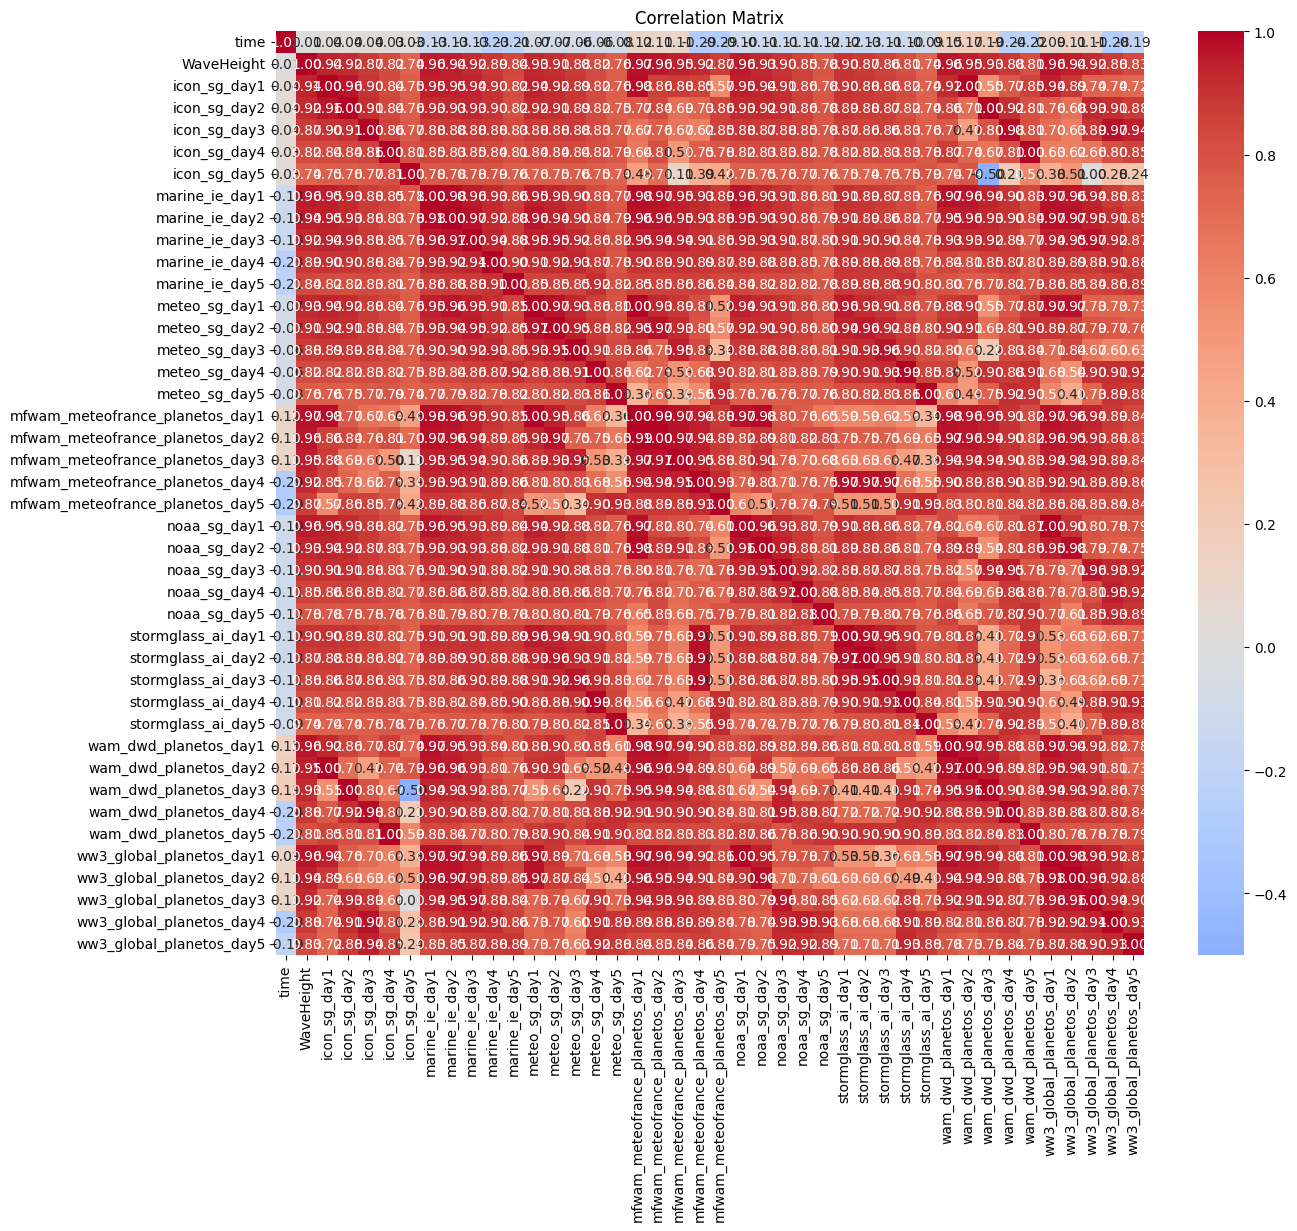

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Show shape of the data
print(f"\n📊 Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Check for missing values
print("\n❓ Missing values per column:")
print(df.isnull().sum())

# Show basic statistics
print("\n📈 Descriptive statistics for numeric columns:")
display(df.describe(include='all'))


📊 Dataset contains 35759 rows and 42 columns.

❓ Missing values per column:
time                                   0
WaveHeight                             0
icon_sg_day1                       21037
icon_sg_day2                       21042
icon_sg_day3                       21112
icon_sg_day4                       21216
icon_sg_day5                       21443
marine_ie_day1                     30411
marine_ie_day2                     30397
marine_ie_day3                     30399
marine_ie_day4                     31459
marine_ie_day5                     31446
meteo_sg_day1                      17689
meteo_sg_day2                      17995
meteo_sg_day3                      18602
meteo_sg_day4                      19294
meteo_sg_day5                      20047
mfwam_meteofrance_planetos_day1    33469
mfwam_meteofrance_planetos_day2    33469
mfwam_meteofrance_planetos_day3    33476
mfwam_meteofrance_planetos_day4    34649
mfwam_meteofrance_planetos_day5    34733
noaa_sg_day1         

,time,WaveHeight,icon_sg_day1,icon_sg_day2,icon_sg_day3,icon_sg_day4,icon_sg_day5,marine_ie_day1,marine_ie_day2,marine_ie_day3,...,wam_dwd_planetos_day1,wam_dwd_planetos_day2,wam_dwd_planetos_day3,wam_dwd_planetos_day4,wam_dwd_planetos_day5,ww3_global_planetos_day1,ww3_global_planetos_day2,ww3_global_planetos_day3,ww3_global_planetos_day4,ww3_global_planetos_day5
count,35759,35759.000000,14722.000000,14717.000000,14647.00000,14543.000000,14316.000000,5348.000000,5362.000000,5360.000000,...,2019.000000,2018.000000,2019.000000,839.000000,838.000000,6760.000000,6737.000000,6704.000000,3097.000000,1576.000000
mean,2022-09-23 06:37:20.901591296,3.253324,3.337911,3.351760,3.37487,3.367511,3.396980,3.459662,3.454867,3.402720,...,3.389198,3.371189,3.365329,3.676877,3.683019,3.762911,3.764248,3.772155,4.191388,4.207659
min,2020-07-02 00:00:00,0.469000,0.690000,0.740000,0.82000,0.800000,0.630000,0.787484,0.780894,0.740484,...,0.820000,0.750000,1.040000,1.150000,1.210000,0.780000,0.790000,0.790000,0.900000,0.790000
25%,2021-07-10 02:30:00,1.992000,2.140000,2.150000,2.15000,2.180000,2.210000,2.198008,2.198476,2.209679,...,2.110000,2.130000,2.135000,2.595000,2.520000,2.250000,2.250000,2.260000,2.660000,2.840000
50%,2022-10-28 15:00:00,2.930000,3.125000,3.090000,3.16000,3.150000,3.170000,3.081467,3.121994,3.066171,...,2.980000,2.960000,3.040000,3.410000,3.395000,3.245000,3.250000,3.210000,3.790000,3.840000
75%,2023-11-11 06:30:00,4.141000,4.210000,4.230000,4.24000,4.210000,4.310000,4.328487,4.289491,4.229468,...,4.245000,4.247500,4.245000,4.445000,4.527500,4.720000,4.700000,4.730000,5.340000,5.160000
max,2024-11-30 00:00:00,15.117000,11.720000,11.200000,11.49000,12.450000,13.220000,14.050480,14.679914,14.228528,...,13.550000,13.710000,12.900000,8.990000,10.240000,16.370001,16.400000,16.840000,11.780000,11.570000
std,NaN,1.702038,1.571120,1.589449,1.58414,1.575393,1.587961,1.722047,1.725357,1.649236,...,1.730024,1.696027,1.646439,1.508781,1.588499,2.083203,2.101482,2.101532,2.059251,2.012333


In [ ]:
import pandas as pd

# Assume df is your DataFrame with 139197 rows.
threshold = len(df) / 2  # Half the number of rows
threshold = 28000

# Identify columns with missing values greater than the threshold
cols_to_drop = df.columns[df.isna().sum() > threshold]
print("Columns to drop:", list(cols_to_drop))

# Drop the identified columns
df = df.drop(columns=cols_to_drop)

print("Remaining columns:", df.columns)
display(df.describe(include='all'))

Columns to drop: ['marine_ie_day1', 'marine_ie_day2', 'marine_ie_day3', 'marine_ie_day4', 'marine_ie_day5', 'mfwam_meteofrance_planetos_day1', 'mfwam_meteofrance_planetos_day2', 'mfwam_meteofrance_planetos_day3', 'mfwam_meteofrance_planetos_day4', 'mfwam_meteofrance_planetos_day5', 'wam_dwd_planetos_day1', 'wam_dwd_planetos_day2', 'wam_dwd_planetos_day3', 'wam_dwd_planetos_day4', 'wam_dwd_planetos_day5', 'ww3_global_planetos_day1', 'ww3_global_planetos_day2', 'ww3_global_planetos_day3', 'ww3_global_planetos_day4', 'ww3_global_planetos_day5']
Remaining columns: Index(['time', 'WaveHeight', 'icon_sg_day1', 'icon_sg_day2', 'icon_sg_day3',
       'icon_sg_day4', 'icon_sg_day5', 'meteo_sg_day1', 'meteo_sg_day2',
       'meteo_sg_day3', 'meteo_sg_day4', 'meteo_sg_day5', 'noaa_sg_day1',
       'noaa_sg_day2', 'noaa_sg_day3', 'noaa_sg_day4', 'noaa_sg_day5',
       'stormglass_ai_day1', 'stormglass_ai_day2', 'stormglass_ai_day3',
       'stormglass_ai_day4', 'stormglass_ai_day5'],
      dtype='

,time,WaveHeight,icon_sg_day1,icon_sg_day2,icon_sg_day3,icon_sg_day4,icon_sg_day5,meteo_sg_day1,meteo_sg_day2,meteo_sg_day3,...,noaa_sg_day1,noaa_sg_day2,noaa_sg_day3,noaa_sg_day4,noaa_sg_day5,stormglass_ai_day1,stormglass_ai_day2,stormglass_ai_day3,stormglass_ai_day4,stormglass_ai_day5
count,35759,35759.000000,14722.000000,14717.000000,14647.00000,14543.000000,14316.000000,18070.000000,17764.000000,17157.00000,...,18512.000000,18552.000000,18528.000000,18503.000000,18504.000000,18512.000000,18552.000000,18528.000000,18503.000000,18504.000000
mean,2022-09-23 06:37:20.901591296,3.253324,3.337911,3.351760,3.37487,3.367511,3.396980,3.266817,3.270657,3.24149,...,3.272808,3.312423,3.289668,3.284684,3.245128,3.345205,3.352973,3.347218,3.348542,3.275975
min,2020-07-02 00:00:00,0.469000,0.690000,0.740000,0.82000,0.800000,0.630000,0.740000,0.670000,0.75000,...,0.610000,0.610000,0.620000,0.610000,0.610000,0.770000,0.820000,0.820000,0.720000,0.630000
25%,2021-07-10 02:30:00,1.992000,2.140000,2.150000,2.15000,2.180000,2.210000,2.100000,2.080000,2.07000,...,2.060000,2.070000,2.060000,2.040000,2.000000,2.150000,2.160000,2.160000,2.150000,2.130000
50%,2022-10-28 15:00:00,2.930000,3.125000,3.090000,3.16000,3.150000,3.170000,3.010000,3.020000,2.99000,...,2.980000,3.000000,2.980000,2.980000,2.950000,3.080000,3.090000,3.100000,3.110000,3.030000
75%,2023-11-11 06:30:00,4.141000,4.210000,4.230000,4.24000,4.210000,4.310000,4.160000,4.200000,4.13000,...,4.180000,4.210000,4.200000,4.190000,4.190000,4.210000,4.230000,4.220000,4.180000,4.130000
max,2024-11-30 00:00:00,15.117000,11.720000,11.200000,11.49000,12.450000,13.220000,11.320000,11.320000,10.90000,...,12.050000,11.740000,13.100000,12.530000,13.190000,11.320000,11.320000,10.900000,11.530000,11.900000
std,NaN,1.702038,1.571120,1.589449,1.58414,1.575393,1.587961,1.536854,1.540686,1.53584,...,1.612565,1.654558,1.642820,1.655950,1.622214,1.581976,1.570833,1.567418,1.587801,1.555297


## Process

In [ ]:
if 'time' in df.columns:
    df['time'] = pd.to_datetime(df['time'])
    df = df.sort_values('time').set_index('time')

# Ensure the DataFrame is sorted by its time index.
df = df.sort_index()

display(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35759 entries, 2020-07-02 00:00:00 to 2024-11-30 00:00:00
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   WaveHeight          35759 non-null  float64
 1   icon_sg_day1        14722 non-null  float64
 2   icon_sg_day2        14717 non-null  float64
 3   icon_sg_day3        14647 non-null  float64
 4   icon_sg_day4        14543 non-null  float64
 5   icon_sg_day5        14316 non-null  float64
 6   meteo_sg_day1       18070 non-null  float64
 7   meteo_sg_day2       17764 non-null  float64
 8   meteo_sg_day3       17157 non-null  float64
 9   meteo_sg_day4       16465 non-null  float64
 10  meteo_sg_day5       15712 non-null  float64
 11  noaa_sg_day1        18512 non-null  float64
 12  noaa_sg_day2        18552 non-null  float64
 13  noaa_sg_day3        18528 non-null  float64
 14  noaa_sg_day4        18503 non-null  float64
 15  noaa_sg_day5      

None

In [ ]:
# Delete every missing row

df = df.dropna()

display(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10625 entries, 2022-08-06 00:00:00 to 2024-06-07 06:00:00
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   WaveHeight          10625 non-null  float64
 1   icon_sg_day1        10625 non-null  float64
 2   icon_sg_day2        10625 non-null  float64
 3   icon_sg_day3        10625 non-null  float64
 4   icon_sg_day4        10625 non-null  float64
 5   icon_sg_day5        10625 non-null  float64
 6   meteo_sg_day1       10625 non-null  float64
 7   meteo_sg_day2       10625 non-null  float64
 8   meteo_sg_day3       10625 non-null  float64
 9   meteo_sg_day4       10625 non-null  float64
 10  meteo_sg_day5       10625 non-null  float64
 11  noaa_sg_day1        10625 non-null  float64
 12  noaa_sg_day2        10625 non-null  float64
 13  noaa_sg_day3        10625 non-null  float64
 14  noaa_sg_day4        10625 non-null  float64
 15  noaa_sg_day5      

None

In [ ]:
import pandas as pd
import numpy as np

def extract_valid_windows(df, forecasted_seq_size):
    """
    Given a time series dataframe 'df' with several features,
    extract as many sliding windows (of length context_seq_size+forecasted_seq_size)
    for which no feature has two consecutive missing values.

    For each valid window, interpolate missing values (linearly) for every feature.

    Parameters:
        df (pd.DataFrame): The input dataframe. It must be sorted by time and have a contiguous time index.
        tar_col (str): The target column (used for naming; the check is performed on every feature).
        context_seq_size (int): Number of time steps used for context (input).
        forecasted_seq_size (int): Number of time steps used for forecast (output).

    Returns:
        X (np.ndarray): Array of shape (num_valid_windows, context_seq_size + forecasted_seq_size, n_features)
                        containing the interpolated values.
        window_start_times (list): A list of the starting timestamps of each valid window.
    """
    window_size = forecasted_seq_size
    valid_windows = []
    window_start_times = []

    # Define a helper to check that the window index is contiguous.
    # For a DateTimeIndex, we expect hourly differences.
    if isinstance(df.index, pd.DatetimeIndex):
        expected_delta = pd.Timedelta(hours=1)

        def is_contiguous(index):
            # Compute differences between consecutive timestamps.
            diffs = index.to_series().diff().iloc[1:]
            return (diffs == expected_delta).all()
    else:
        # For a numeric or default index: assume difference of 1.
        def is_contiguous(index):
            diffs = pd.Series(index).diff().iloc[1:]
            return (diffs == 1).all()

    # Slide through the dataframe.
    nb_valid_windows = len(valid_windows)
    for start in range(0, len(df) - window_size + 1, 4): # step size
        if start % 10000 == 0:
            print(f"Processing window {start}")
            print(f"Progress: {start / (len(df) - window_size) * 100:.2f}%")
            print(f"number of valid windows: {len(valid_windows) - nb_valid_windows}")
            print("----------------------------------")
            nb_valid_windows = len(valid_windows)
        window = df.iloc[start:start+window_size].copy()  # make a copy for interpolation

        # Check if the index for this window is contiguous.
        if not is_contiguous(window.index):
            continue

        # Append the window data (as a numpy array) and record its start timestamp.
        valid_windows.append(window.values)
        window_start_times.append(window.index[0])

    if valid_windows:
        # Stack all valid windows into a numpy array.
        X = np.array(valid_windows)
    else:
        X = np.empty((0, window_size, df.shape[1]))

    return X, window_start_times

def split_X_y(X, forecasted_seq_size):
    """
    Splits the dataset X of sliding windows into input and output parts.

    Parameters:
        X (np.ndarray): Array of shape (num_windows, context_seq_size + forecasted_seq_size, n_features)
                        containing the entire windows.
        context_seq_size (int): Number of time steps for the context (input) part.
        forecasted_seq_size (int): Number of time steps for the forecast (output) part.
        tar_col_idx (int): The index (column index) in X for the target feature.

    Returns:
        X_input (np.ndarray): Input data of shape (num_windows, context_seq_size, n_features)
        y_output (np.ndarray): Forecast output of shape (num_windows, forecasted_seq_size) for the target feature.
    """
    # Input: all features for the first context_seq_size time steps
    X_input = X[:, :, 1:]
    # Output: forecasted_seq_size time steps
    y_output = X[:, :, 0]

    return X_input, y_output

## Create

In [ ]:
# Extract windows: Only windows where the target feature (tar_col) is complete are kept.
# Note: All features (the entire df) are included in the final window.
X, window_start_times = extract_valid_windows(df, forecasted_seq_size)
# Check if X has any missing values, and float64
X = X.astype(np.float64)
if np.isnan(X).any():
    raise ValueError("X contains missing values.")

print("Number of valid windows extracted:", X.shape[0])
print("Shape of each window:", X.shape[1:], "\n")

X_input, y_output = split_X_y(X, forecasted_seq_size)

print("X_input shape (context part, all features):", X_input.shape)
print("y_output shape (forecast part, target feature only):", y_output.shape)

Processing window 0
Progress: 0.00%
number of valid windows: 0
----------------------------------
Processing window 10000
Progress: 94.33%
number of valid windows: 1454
----------------------------------
Number of valid windows extracted: 1494
Shape of each window: (24, 21) 

X_input shape (context part, all features): (1494, 24, 20)
y_output shape (forecast part, target feature only): (1494, 24)


In [ ]:
def split_train_val_test(X_input, y_output, train_ratio=0.7, val_ratio=0.1, test_ratio=0.2):
    """
    Splits the dataset (X_input, y_output) into training, validation, and test sets
    based on the ratios provided. The split is done sequentially as the data is assumed
    to be in chronological order.

    Parameters:
      X_input (np.ndarray): Input data of shape (n_windows, context_seq_size, n_features).
      y_output (np.ndarray): Output data of shape (n_windows, forecasted_seq_size) for the target feature.
      train_ratio (float): The fraction for the training set.
      val_ratio (float): The fraction for the validation set.
      test_ratio (float): The fraction for the test set.

    Returns:
      A tuple of tuples: ((X_train, y_train), (X_val, y_val), (X_test, y_test))
    """
    # Check that ratios sum to 1.0 (or nearly)
    total_ratio = train_ratio + val_ratio + test_ratio
    if not np.isclose(total_ratio, 1.0):
        raise ValueError("The train, validation, and test ratios must sum to 1.0")

    n_windows = X_input.shape[0]
    train_end = int(n_windows * train_ratio)
    val_end = train_end + int(n_windows * val_ratio)

    # Sequential splitting
    X_train, y_train = X_input[:train_end], y_output[:train_end]
    X_val, y_val     = X_input[train_end:val_end], y_output[train_end:val_end]
    X_test, y_test   = X_input[val_end:], y_output[val_end:]

    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

(train_data, train_labels), (val_data, val_labels), (test_data, test_labels) = split_train_val_test(X_input, y_output, 0.7, 0.1, 0.2)

print("Training set shape (X, y):", train_data.shape, train_labels.shape)
print("Validation set shape (X, y):", val_data.shape, val_labels.shape)
print("Test set shape (X, y):", test_data.shape, test_labels.shape)

Training set shape (X, y): (1045, 24, 20) (1045, 24)
Validation set shape (X, y): (149, 24, 20) (149, 24)
Test set shape (X, y): (300, 24, 20) (300, 24)


# Building the Dataset




## Sliding Windows

In [ ]:

X, Y = train_data, train_labels

X_val, Y_val = val_data, val_labels

X_test, Y_test = test_data, test_labels

print("X shape:", X.shape)
print("y shape:", Y.shape)

print("X_val shape:", X_val.shape)
print("y_val shape:", Y_val.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", Y_test.shape)

X shape: (1045, 24, 20)
y shape: (1045, 24)
X_val shape: (149, 24, 20)
y_val shape: (149, 24)
X_test shape: (300, 24, 20)
y_test shape: (300, 24)


In [ ]:
target_idx = tar_idx

import numpy as np

# Assuming Y has shape (batch_size, seq_len) and X has shape (batch_size, seq_len, num_features)

# Get the number of features from X
num_features = X.shape[2]

# Duplicate Y along the last dimension (features)
Y = np.repeat(Y[..., np.newaxis], num_features, axis=-1)

# Now Y has shape (batch_size, seq_len, num_features)
print("Y shape:", Y.shape)

# Duplicate Y_val along the last dimension (features)
Y_val = np.repeat(Y_val[..., np.newaxis], num_features, axis=-1)

# Duplicate Y_test along the last dimension (features)
Y_test = np.repeat(Y_test[..., np.newaxis], num_features, axis=-1)

# Now Y_val and Y_test have shape (batch_size, seq_len, num_features)
print("Y_val shape:", Y_val.shape)
print("Y_test shape:", Y_test.shape)

Y shape: (1045, 24, 20)
Y_val shape: (149, 24, 20)
Y_test shape: (300, 24, 20)


## Rescaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np

# Rescale the Data By fitting a StandardScaler on the training Set

if rescale_data :

  scaler = StandardScaler()
  scaler.fit(X.reshape(X.shape[0] * X.shape[1], X.shape[2]))

  X_reshaped = X.reshape(X.shape[0] * X.shape[1], X.shape[2])
  X_rescaled = scaler.transform(X_reshaped)
  X_rescaled = X_rescaled.reshape(X.shape[0], X.shape[1], X.shape[2])

  Y_reshaped = Y.reshape(Y.shape[0] * Y.shape[1], Y.shape[2])
  Y_rescaled = scaler.transform(Y_reshaped)
  Y_rescaled = Y_rescaled.reshape(Y.shape[0], Y.shape[1], Y.shape[2])

  print("X_rescaled shape:", X_rescaled.shape)
  print("y_rescaled shape:", Y_rescaled.shape)

  X_val_reshaped = X_val.reshape(X_val.shape[0] * X_val.shape[1], X_val.shape[2])
  X_val_rescaled = scaler.transform(X_val_reshaped)
  X_val_rescaled = X_val_rescaled.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2])

  Y_val_reshaped = Y_val.reshape(Y_val.shape[0] * Y_val.shape[1], Y_val.shape[2])
  Y_val_rescaled = scaler.transform(Y_val_reshaped)
  Y_val_rescaled = Y_val_rescaled.reshape(Y_val.shape[0], Y_val.shape[1], Y_val.shape[2])

  print("X_val_rescaled shape:", X_val_rescaled.shape)
  print("y_val_rescaled shape:", Y_val_rescaled.shape)

  X_test_reshaped = X_test.reshape(X_test.shape[0] * X_test.shape[1], X_test.shape[2])
  X_test_rescaled = scaler.transform(X_test_reshaped)
  X_test_rescaled = X_test_rescaled.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

  Y_test_reshaped = Y_test.reshape(Y_test.shape[0] * Y_test.shape[1], Y_test.shape[2])
  Y_test_rescaled = scaler.transform(Y_test_reshaped)
  Y_test_rescaled = Y_test_rescaled.reshape(Y_test.shape[0], Y_test.shape[1], Y_test.shape[2])

  print("X_test_rescaled shape:", X_test_rescaled.shape)
  print("y_test_rescaled shape:", Y_test_rescaled.shape)

else :
  X_rescaled = X
  Y_rescaled = Y
  X_val_rescaled = X_val
  Y_val_rescaled = Y_val
  X_test_rescaled = X_test
  Y_test_rescaled = Y_test

# MSE and MAE

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

num_features = X_rescaled.shape[2]  # Get the number of features
# Get the column names from the DataFrame (columns 1 to 21)
feature_names = df.columns[1:22].tolist()  # Assuming your DataFrame is called 'df'

# Initialize lists to store MSE and MAE values
mse_values = []
mae_values = []

# Loop through each feature
for i in range(num_features):
    # Flatten the data for the current feature across all batches and time steps
    x_feature = X_rescaled[:, :, i].flatten()
    y_feature = Y_rescaled[:, :, i].flatten()

    # Calculate MSE and MAE for the current feature
    mse = mean_squared_error(x_feature, y_feature)
    mae = mean_absolute_error(x_feature, y_feature)

    # Append the calculated values to the lists
    mse_values.append(mse)
    mae_values.append(mae)

# Create a Pandas DataFrame to display the results in a table
results_df = pd.DataFrame({
    "Feature": feature_names,
    "MAE": mae_values,
    "MSE": mse_values
})

# Sort the DataFrame by MAE in ascending order (best to worst)
results_df_sorted = results_df.sort_values(by='MAE')

# Display the sorted DataFrame
display(results_df_sorted)


,Feature,MAE,MSE
10,noaa_sg_day1,0.291684,0.161547
5,meteo_sg_day1,0.347816,0.246699
0,icon_sg_day1,0.350307,0.241972
11,noaa_sg_day2,0.370636,0.275635
1,icon_sg_day2,0.409299,0.328829
6,meteo_sg_day2,0.412012,0.344931
12,noaa_sg_day3,0.449382,0.401265
7,meteo_sg_day3,0.506857,0.500562
2,icon_sg_day3,0.523145,0.553567
15,stormglass_ai_day1,0.534862,0.576785


## Select best models

In [ ]:
# Select the top n_best rows (best n_best features)

if multi == False:
  n_best = 1

best_6_features = results_df_sorted.head(n=n_best)

# Display the DataFrame with the best n_best features
display(best_6_features)

# Get the names of the best 6 features
best_feature_names = best_6_features["Feature"].tolist()

# Get the column indices of these features in the original DataFrame
best_feature_indices = [df.columns.get_loc(col) - 1 for col in best_feature_names]  # Subtract 1 because 'time' is the first column

print("Best 6 features:", best_feature_names)
print("Best 6 feature indices:", best_feature_indices)

# Select the subset of X and Y containing only the best 6 features
X_subset = X_rescaled[:, :, best_feature_indices]
Y_subset = Y_rescaled[:, :, best_feature_indices]

X_subset_val = X_val_rescaled[:, :, best_feature_indices]
Y_subset_val = Y_val_rescaled[:, :, best_feature_indices]

X_subset_test = X_test_rescaled[:, :, best_feature_indices]
Y_subset_test = Y_test_rescaled[:, :, best_feature_indices]

if residuals_only:
  Y_subset = Y_subset - X_subset
  Y_subset_val = Y_subset_val - X_subset_val
  Y_subset_test = Y_subset_test - X_subset_test

print("X_subset shape:", X_subset.shape)
print("Y_subset shape:", Y_subset.shape)

print("X_subset_val shape:", X_subset_val.shape)
print("Y_subset_val shape:", Y_subset_val.shape)

print("X_subset_test shape:", X_subset_test.shape)
print("Y_subset_test shape:", Y_subset_test.shape)

,Feature,MAE,MSE
10,noaa_sg_day1,0.291684,0.161547
5,meteo_sg_day1,0.347816,0.246699
0,icon_sg_day1,0.350307,0.241972
11,noaa_sg_day2,0.370636,0.275635
1,icon_sg_day2,0.409299,0.328829
6,meteo_sg_day2,0.412012,0.344931
12,noaa_sg_day3,0.449382,0.401265
7,meteo_sg_day3,0.506857,0.500562
2,icon_sg_day3,0.523145,0.553567
15,stormglass_ai_day1,0.534862,0.576785


Best 6 features: ['noaa_sg_day1', 'meteo_sg_day1', 'icon_sg_day1', 'noaa_sg_day2', 'icon_sg_day2', 'meteo_sg_day2', 'noaa_sg_day3', 'meteo_sg_day3', 'icon_sg_day3', 'stormglass_ai_day1', 'stormglass_ai_day2', 'noaa_sg_day4', 'stormglass_ai_day3', 'meteo_sg_day4', 'stormglass_ai_day4', 'icon_sg_day4', 'meteo_sg_day5', 'stormglass_ai_day5', 'noaa_sg_day5', 'icon_sg_day5']
Best 6 feature indices: [10, 5, 0, 11, 1, 6, 12, 7, 2, 15, 16, 13, 17, 8, 18, 3, 9, 19, 14, 4]
X_subset shape: (1045, 24, 20)
Y_subset shape: (1045, 24, 20)
X_subset_val shape: (149, 24, 20)
Y_subset_val shape: (149, 24, 20)
X_subset_test shape: (300, 24, 20)
Y_subset_test shape: (300, 24, 20)


In [ ]:
# Display MSE and MAE for X_subset_test and Y_subset_test

num_features = X_subset_test.shape[2]  # Get the number of features
feature_names = best_feature_names # Assuming you have best_feature_names

mse_values = []
mae_values = []

if residuals_only:
  print("Residuals MAE and MSE")

for i in range(num_features):
    # Flatten the data for the current feature across all batches and time steps
    x_feature = X_subset_test[:, :, i].flatten()
    y_feature = Y_subset_test[:, :, i].flatten()
    if residuals_only:
      y_feature = Y_subset_test[:, :, i].flatten() + X_subset_test[:, :, i].flatten()

    # Calculate MSE and MAE for the current feature
    mse = mean_squared_error(x_feature, y_feature)
    mae = mean_absolute_error(x_feature, y_feature)

    # Append the calculated values to the lists
    mse_values.append(mse)
    mae_values.append(mae)

results_df = pd.DataFrame({
    "Feature": feature_names,
    "MAE": mae_values,
    "MSE": mse_values
})

results_df_sorted = results_df.sort_values(by='MAE')

# Display the DataFrame
display(results_df_sorted)

Residuals MAE and MSE


,Feature,MAE,MSE
0,noaa_sg_day1,0.424560,0.337506
1,meteo_sg_day1,0.430636,0.336311
9,stormglass_ai_day1,0.430636,0.336311
2,icon_sg_day1,0.441666,0.408661
10,stormglass_ai_day2,0.481426,0.440094
5,meteo_sg_day2,0.481426,0.440094
4,icon_sg_day2,0.514540,0.520430
3,noaa_sg_day2,0.560584,0.568174
8,icon_sg_day3,0.616047,0.738247
6,noaa_sg_day3,0.627183,0.685988


In [ ]:
feature_num = len(X_subset[0][0])
print("feature_num :", len(X_subset[0][0]))

feature_num : 20


# Dataset and DataLoader

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class WaveForecastDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create loaders

batch_size = 16

train_loader = DataLoader(WaveForecastDataset(X_subset, Y_subset), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(WaveForecastDataset(X_subset_val, Y_subset_val), batch_size=batch_size, shuffle=False)
test_loader = DataLoader(WaveForecastDataset(X_subset_test, Y_subset_test), batch_size=batch_size, shuffle=False)

train_loader_uni = DataLoader(WaveForecastDataset(X_subset, Y_subset[:,:,target_idx].squeeze()), batch_size=batch_size, shuffle=True)
val_loader_uni = DataLoader(WaveForecastDataset(X_subset_val, Y_subset_val[:,:,target_idx].squeeze()), batch_size=batch_size, shuffle=False)
test_loader_uni = DataLoader(WaveForecastDataset(X_subset_test, Y_subset_test[:,:,target_idx].squeeze()), batch_size=batch_size, shuffle=False)


# LSTM Model


## Model Definition

In [ ]:
import torch.nn as nn

class LSTMForecastModel(nn.Module):
    def __init__(self, input_size=feature_num, hidden_size=64, num_layers=2, output_size=forecasted_seq_size):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x: (batch, seq_len, input_size)
        _, (hn, _) = self.lstm(x)  # hn: (num_layers, batch, hidden_size)
        last_hidden = hn[-1]       # Take hidden state from last LSTM layer
        out = self.fc(last_hidden) # Shape: (batch, output_size)
        return out


## Training

In [ ]:
import torch.optim as optim
import time

lstm_hidden_size = 64
lstm_num_layers = 2

# -------------------------------
# LSTM Training Pipeline
# -------------------------------

if LSTM_Train :
  model = LSTMForecastModel(input_size=feature_num, hidden_size=lstm_hidden_size, num_layers=lstm_num_layers, output_size=forecasted_seq_size).to(device)
  lstm_num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
  print(f"Number of parameters: {lstm_num_params}")

  criterion = nn.MSELoss()

  optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)

  best_val_loss = float('inf')
  patience = 3
  epochs_no_improve = 0
  n_epochs = 100

  start_time = time.time()

  for epoch in range(n_epochs):
      model.train()
      train_loss = 0
      for X_batch, y_batch in train_loader_uni:
          X_batch, y_batch = X_batch.to(device), y_batch.to(device)

          optimizer.zero_grad()
          output = model(X_batch)
          loss = criterion(output, y_batch)
          loss.backward()
          optimizer.step()
          train_loss += loss.item()

      train_loss /= len(train_loader_uni)

      # Validation
      model.eval()
      val_loss = 0
      with torch.no_grad():
          for X_batch, y_batch in val_loader_uni:
              X_batch, y_batch = X_batch.to(device), y_batch.to(device)
              output = model(X_batch)
              loss = criterion(output, y_batch)
              val_loss += loss.item()
      val_loss /= len(val_loader_uni)

      # Testing Loop
      model.eval()
      test_loss = 0.0
      with torch.no_grad():
          for X_batch, y_batch in test_loader_uni:
              X_batch, y_batch = X_batch.to(device), y_batch.to(device)
              output = model(X_batch)
              loss = criterion(output, y_batch)
              test_loss += loss.item()
      test_loss /= len(test_loader_uni)
      print(f"Epoch {epoch+1}/{n_epochs} — Train Loss: {train_loss:.4f} — Val Loss: {val_loss:.4f} - Test Loss: {test_loss:.4f}")

      # Early stopping
      if val_loss < best_val_loss:
          best_val_loss = val_loss
          epochs_no_improve = 0
          torch.save(model.state_dict(), 'best_lstm.pt')
      else:
          epochs_no_improve += 1
          if epochs_no_improve >= patience:
              print("Early stopping triggered!")
              break

  lstm_training_time = (time.time() - start_time)/(epoch+1)
  print(f"Training time: {lstm_training_time:.2f} seconds")

Number of parameters: 56856
Epoch 1/100 — Train Loss: 0.1622 — Val Loss: 0.3397 - Test Loss: 0.3313
Epoch 2/100 — Train Loss: 0.1608 — Val Loss: 0.3385 - Test Loss: 0.3320
Epoch 3/100 — Train Loss: 0.1611 — Val Loss: 0.3374 - Test Loss: 0.3307
Epoch 4/100 — Train Loss: 0.1585 — Val Loss: 0.3330 - Test Loss: 0.3200
Epoch 5/100 — Train Loss: 0.1582 — Val Loss: 0.3359 - Test Loss: 0.3348
Epoch 6/100 — Train Loss: 0.1558 — Val Loss: 0.3298 - Test Loss: 0.3124
Epoch 7/100 — Train Loss: 0.1511 — Val Loss: 0.3045 - Test Loss: 0.2935
Epoch 8/100 — Train Loss: 0.1598 — Val Loss: 0.3366 - Test Loss: 0.3219
Epoch 9/100 — Train Loss: 0.1501 — Val Loss: 0.3335 - Test Loss: 0.3214
Epoch 10/100 — Train Loss: 0.1455 — Val Loss: 0.3321 - Test Loss: 0.2998
Early stopping triggered!
Training time: 0.21 seconds


## Test Metrics

In [ ]:
# Load best model

if LSTM_Train :
  model = LSTMForecastModel(input_size=feature_num, hidden_size=lstm_hidden_size, num_layers=lstm_num_layers, output_size=forecasted_seq_size).to(device)
  model.load_state_dict(torch.load('best_lstm.pt'))
  model.eval()

  preds = []
  targets = []

  with torch.no_grad():
      for X_batch, y_batch in test_loader_uni:
          X_batch = X_batch.to(device)
          output = model(X_batch)
          preds.append(output.cpu())
          targets.append(y_batch)

  y_pred_lstm = torch.cat(preds).numpy()
  y_true_lstm = torch.cat(targets).numpy()

  print("y_pred_lstm shape:", y_pred_lstm.shape)
  print("y_true_lstm shape:", y_true_lstm.shape)

  from sklearn.metrics import mean_absolute_error, mean_squared_error

  mae = mean_absolute_error(y_true_lstm, y_pred_lstm)
  mse = mean_squared_error(y_true_lstm, y_pred_lstm)

  print(f"LSTM MAE:  {mae:.3f}")
  print(f"LSTM MSE: {mse:.3f}")

y_pred_lstm shape: (300, 24)
y_true_lstm shape: (300, 24)
LSTM MAE:  0.402
LSTM MSE: 0.294


# SegRNN

## Model

In [ ]:
import torch
import torch.nn as nn


import torch
import torch.nn as nn

class SegRNN(nn.Module):
    """
    Segment Recurrent Neural Network for long-term multivariate time series forecasting.

    Args:
        input_len (int): Length of the historical look-back window L.
        horizon (int): Forecast horizon H.
        window_size (int): Segment length w (must divide both L and H).
        hidden_dim (int): Dimensionality d of GRU hidden state.
        num_features (int): Number of input variables/features ft (for CP embeddings).
        num_layers (int, optional): Number of GRU layers (default: 1).
        dropout (float, optional): Dropout rate after decoding GRU (default: 0.0).
    """
    def __init__(
        self,
        input_len: int,
        horizon: int,
        window_size: int,
        hidden_dim: int,
        num_features: int,
        num_layers: int = 1,
        dropout: float = 0.0,
    ):
        super().__init__()
        assert input_len % window_size == 0 and horizon % window_size == 0, \
            "window_size must divide both input_len and horizon"

        # core attributes
        self.L = input_len
        self.H = horizon
        self.w = window_size
        self.n = input_len // window_size
        self.m = horizon // window_size
        self.d = hidden_dim
        self.num_layers = num_layers
        self.F = num_features

        # whether to include channel embedding
        self.multi = multi  # <<< multi‐switch

        # Projection of each segment along time: R^w -> R^d
        self.input_proj = nn.Sequential(
            nn.Linear(self.w, self.d),
            nn.ReLU()
        )

        # Shared GRU for encoding and decoding
        self.gru = nn.GRU(
            input_size=self.d,
            hidden_size=self.d,
            num_layers=self.num_layers,
            batch_first=True
        )

        # Positional embeddings
        if self.multi:
            # split d into two halves: rel‐pos + chan‐pos
            self.rel_pos_emb = nn.Embedding(self.m, self.d // 2)
            self.chan_pos_emb = nn.Embedding(self.F, self.d // 2)
        else:
            # no channel embedding: give full d to relative positions
            self.rel_pos_emb = nn.Embedding(self.m, self.d)
            self.chan_pos_emb = None  # unused
        # <<< multi‐switch

        self.dropout = nn.Dropout(dropout)
        self.pred_layer = nn.Linear(self.d, self.w)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Forward pass of SegRNN.

        Args:
            x: Tensor of shape (batch_size, L, F)
        Returns:
            y: Tensor of shape (batch_size, H, F)
        """
        B, L, F = x.shape
        assert L == self.L and F == self.F, \
            f"Expected input shape (_, {self.L}, {self.F}), got {x.shape}"

        # Instance normalization along time
        last = x[:, -1, :]              # (B, F)
        x_norm = x - last.unsqueeze(1)  # (B, L, F)
        if residuals_only:
            x_norm = x

        # flatten to (B*F, L)
        x_flat = x_norm.permute(0, 2, 1).contiguous().view(B * F, L)
        x_seg  = x_flat.view(B * F, self.n, self.w)  # (B*F, n, w)
        x_proj = self.input_proj(x_seg)             # (B*F, n, d)

        # encode
        _, h_n   = self.gru(x_proj)   # (num_layers, B*F, d)
        h_enc    = h_n[-1]            # (B*F, d)

        # prepare decoder initial states
        h0_dec = h_n.repeat(1, 1, 1)                  # (num_layers, B*F, d)
        h_rep  = h_enc.unsqueeze(1).expand(-1, self.m, -1)  # (B*F, m, d)

        # build positional bias
        # relative positions
        rp = self.rel_pos_emb.weight.unsqueeze(0).expand(B * F, -1, -1)
        if self.multi:
            # channel positions only when multi=True
            feat_idx = torch.arange(F, device=x.device) \
                          .unsqueeze(0).expand(B, -1).reshape(-1)  # (B*F,)
            cp = self.chan_pos_emb(feat_idx)                  # (B*F, d/2)
            cp = cp.unsqueeze(1).expand(-1, self.m, -1)       # (B*F, m, d/2)
            pe = torch.cat([rp, cp], dim=-1)                  # (B*F, m, d)
        else:
            # no channel embedding
            pe = rp  # (B*F, m, d)
        # <<< multi‐switch

        # decode
        dec_in  = h_rep + pe              # (B*F, m, d)
        dec_out, _ = self.gru(dec_in, h0_dec)
        dec_out = self.dropout(dec_out)

        # predict per-segment
        seg_preds = self.pred_layer(dec_out)  # (B*F, m, w)
        y_norm   = seg_preds.view(B, F, self.H)  # (B, F, H)

        # un-normalize and reshape
        y = y_norm + last.unsqueeze(-1)          # (B, F, H)
        if residuals_only:
            y = y_norm
        return y.permute(0, 2, 1).contiguous()   # (B, H, F)


## Training

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
#from segrnn import SegRNN  # assuming your module is saved as segrnn.py

# -------------------------------
# SegRNN Training Pipeline (Multivariate)
# -------------------------------
if SegRNN_Train :
  # Hyperparameters (tweak as needed)
  input_len      = context_seq_size           # historical look-back window L
  horizon        = forecasted_seq_size           # forecast horizon H
  window_size    = min(48, forecasted_seq_size//4)            # segment length w (must divide L & H)
  seg_hidden_dim = 512           # GRU hidden size d
  seg_num_layers = 1             # number of GRU layers
  dropout_rate   = 0.5           # dropout after decoding
  learning_rate  = 1e-4          # optimizer learning rate
  n_epochs       = 100           # max number of epochs
  patience       = 10             # early-stop patience

  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

  # replace with the actual number of channels in your dataset
  num_channels = next(iter(test_loader))[0].shape[1]  # infer C from test_loader

  model = SegRNN(
      input_len=input_len,
      horizon=horizon,
      window_size=window_size,
      hidden_dim=seg_hidden_dim,
      num_features=feature_num,
      num_layers=seg_num_layers,
      dropout=dropout_rate
  ).to(device)

  SegRNN_num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
  print(f"Number of trainable parameters: {SegRNN_num_params:,}")

  #criterion = nn.MSELoss()
  criterion = nn.L1Loss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)

  best_val_loss = float('inf')
  epochs_no_improve = 0

  start_time = time.time()
  for epoch in range(1, n_epochs + 1):
      # ---- Training ----
      model.train()
      train_loss = 0.0
      for X_batch, y_batch in train_loader:
          X_batch = X_batch.to(device)        # shape: (B, L, F)
          y_batch = y_batch.to(device)        # shape: (B, H, F)

          optimizer.zero_grad()
          preds = model(X_batch)              # (B, H, F))
          loss = criterion(preds, y_batch)
          loss.backward()
          optimizer.step()
          train_loss += loss.item()
      train_loss /= len(train_loader)

      # ---- Validation ----
      model.eval()
      val_loss = 0.0
      with torch.no_grad():
          for X_batch, y_batch in val_loader:
              X_batch = X_batch.to(device)
              y_batch = y_batch.to(device)
              preds = model(X_batch)
              val_loss += criterion(preds, y_batch).item()
      val_loss /= len(val_loader)

      # ---- Testing ----
      test_loss = 0.0
      with torch.no_grad():
          for X_batch, y_batch in test_loader:
              X_batch = X_batch.to(device)
              y_batch = y_batch.to(device)
              preds = model(X_batch)
              test_loss += criterion(preds, y_batch).item()
      test_loss /= len(test_loader)

      print(f"Epoch {epoch}/{n_epochs} "
            f"— Train Loss: {train_loss:.4f} "
            f"— Val Loss: {val_loss:.4f} "
            f"— Test Loss: {test_loss:.4f}")

      # ---- Apply 0.8× decay once after epoch 3 ----
      if epoch == 3:
          for pg in optimizer.param_groups:
              pg['lr'] *= 0.8
          print(f"--> Learning rate decayed to {optimizer.param_groups[0]['lr']:.2e}")

      # ---- Early Stopping ----
      if val_loss < best_val_loss:
          best_val_loss = val_loss
          epochs_no_improve = 0
          torch.save(model.state_dict(), 'best_segrnn.pt')
      else:
          epochs_no_improve += 1
          if epochs_no_improve >= patience:
              print("Early stopping triggered.")
              break

  SegRNN_training_time = (time.time() - start_time) / epoch
  print(f"Average training time per epoch: {SegRNN_training_time:.2f} seconds")


Number of trainable parameters: 1,588,742
Epoch 1/100 — Train Loss: 0.5428 — Val Loss: 0.8086 — Test Loss: 0.6468
Epoch 2/100 — Train Loss: 0.5325 — Val Loss: 0.8086 — Test Loss: 0.6454
Epoch 3/100 — Train Loss: 0.5239 — Val Loss: 0.8125 — Test Loss: 0.6448
--> Learning rate decayed to 8.00e-05
Epoch 4/100 — Train Loss: 0.5221 — Val Loss: 0.8175 — Test Loss: 0.6484
Epoch 5/100 — Train Loss: 0.5165 — Val Loss: 0.8103 — Test Loss: 0.6427
Epoch 6/100 — Train Loss: 0.5149 — Val Loss: 0.8037 — Test Loss: 0.6399
Epoch 7/100 — Train Loss: 0.5126 — Val Loss: 0.8038 — Test Loss: 0.6428
Epoch 8/100 — Train Loss: 0.5103 — Val Loss: 0.7970 — Test Loss: 0.6413
Epoch 9/100 — Train Loss: 0.5069 — Val Loss: 0.7990 — Test Loss: 0.6413
Epoch 10/100 — Train Loss: 0.5042 — Val Loss: 0.8285 — Test Loss: 0.6659
Epoch 11/100 — Train Loss: 0.5013 — Val Loss: 0.8081 — Test Loss: 0.6578
Epoch 12/100 — Train Loss: 0.5031 — Val Loss: 0.8083 — Test Loss: 0.6509
Epoch 13/100 — Train Loss: 0.5015 — Val Loss: 0.7917 

## Testing

In [ ]:
import torch
#from segrnn import SegRNN
from sklearn.metrics import mean_absolute_error, mean_squared_error

# -------------------------------
# SegRNN Testing Pipeline
# -------------------------------
if SegRNN_Train :
# Hyperparameters must match those used during training
  #input_len      = context_seq_size           # historical look-back window L
  #horizon        = forecasted_seq_size           # forecast horizon H
  #window_size    = forecasted_seq_size//4            # segment length w (must divide L & H)
  #seg_hidden_dim = 512
  #seg_num_layers = 1
  #dropout_rate   = 0.1
  device         = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  num_channels   = next(iter(test_loader))[0].shape[1]  # infer C from test_loader

  # Recreate model and load weights
  model = SegRNN(
      input_len=input_len,
      horizon=horizon,
      window_size=window_size,
      hidden_dim=seg_hidden_dim,
      num_features=feature_num,
      num_layers=seg_num_layers,
      dropout=dropout_rate
  ).to(device)

  param_count = sum(p.numel() for p in model.parameters() if p.requires_grad)
  print(f"Number of parameters: {param_count:,}")

  model.load_state_dict(torch.load('best_segrnn.pt', weights_only=True))
  model.eval()

  # ---- Multivariate evaluation ----
  all_preds = []
  all_targets = []
  with torch.no_grad():
      for X_batch, Y_batch in test_loader:
          X_batch = X_batch.to(device)  # (B, L, F)
          preds = model(X_batch)        # (B, H, F)
          all_preds.append(preds.cpu())
          all_targets.append(Y_batch)

  Y_pred_SegRNN = torch.cat(all_preds).numpy()    # shape: (N, H, F)
  Y_true_SegRNN = torch.cat(all_targets).numpy()  # shape: (N, H, F)
  print("Y_pred shape:", Y_pred_SegRNN.shape)
  print("Y_true shape:", Y_true_SegRNN.shape)

  mae_multi = mean_absolute_error(Y_true_SegRNN.flatten(), Y_pred_SegRNN.flatten())
  mse_multi = mean_squared_error(Y_true_SegRNN.flatten(), Y_pred_SegRNN.flatten())
  print(f"SegRNN Multivariate MAE: {mae_multi:.4f}")
  print(f"SegRNN Multivariate MSE: {mse_multi:.4f}")

  # ---- Single-channel evaluation ----
  all_preds = []
  all_targets = []
  with torch.no_grad():
      for X_batch, Y_batch in test_loader:
          X_batch = X_batch.to(device)
          preds = model(X_batch)[:, :, target_idx]  # (B, H)
          all_preds.append(preds.cpu())
          all_targets.append(Y_batch[:, :, target_idx])

  Y_pred_uni_SegRNN = torch.cat(all_preds).numpy()    # shape: (N, H)
  Y_true_uni_SegRNN = torch.cat(all_targets).numpy()  # shape: (N, H)
  print("Y_pred_uni shape:", Y_pred_uni_SegRNN.shape)
  print("Y_true_uni shape:", Y_true_uni_SegRNN.shape)

  mae_uni = mean_absolute_error(Y_true_uni_SegRNN.flatten(), Y_pred_uni_SegRNN.flatten())
  mse_uni = mean_squared_error(Y_true_uni_SegRNN.flatten(), Y_pred_uni_SegRNN.flatten())
  print(f"SegRNN MAE on channel {target_idx}: {mae_uni:.4f}")
  print(f"SegRNN MSE on channel {target_idx}: {mse_uni:.4f}")


Number of parameters: 1,588,742
Y_pred shape: (300, 24, 20)
Y_true shape: (300, 24, 20)
SegRNN Multivariate MAE: 0.6330
SegRNN Multivariate MSE: 0.7902
Y_pred_uni shape: (300, 24)
Y_true_uni shape: (300, 24)
SegRNN MAE on channel 0: 0.4059
SegRNN MSE on channel 0: 0.2974


# TCN Model

## Model Definition

In [ ]:
import time
import torch
import torch.nn as nn
import torch.optim as optim

# -------------------------------
# Chomp1d: Remove extra timesteps
# -------------------------------
class Chomp1d(nn.Module):
    def __init__(self, chomp_size):
        super(Chomp1d, self).__init__()
        self.chomp_size = chomp_size

    def forward(self, x):
        # x: (batch, channels, seq_len)
        # Remove the last chomp_size timesteps
        if self.chomp_size > 0:
            return x[:, :, :-self.chomp_size]
        return x

# -------------------------------
# Define a Temporal Block for the TCN
# -------------------------------
class TemporalBlock(nn.Module):
    def __init__(self, n_inputs, n_outputs, kernel_size, stride, dilation, dropout=0.2):
        super(TemporalBlock, self).__init__()
        self.kernel_size = kernel_size
        self.dilation = dilation
        # Padding: pad on the left with (kernel_size - 1) * dilation timesteps.
        self.padding = (kernel_size - 1) * dilation

        self.conv1 = nn.Conv1d(
            in_channels=n_inputs,
            out_channels=n_outputs,
            kernel_size=kernel_size,
            stride=stride,
            padding=self.padding,
            dilation=dilation
        )
        self.chomp1 = Chomp1d(self.padding)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout)

        self.conv2 = nn.Conv1d(
            in_channels=n_outputs,
            out_channels=n_outputs,
            kernel_size=kernel_size,
            stride=stride,
            padding=self.padding,
            dilation=dilation
        )
        self.chomp2 = Chomp1d(self.padding)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout)

        # Downsample if input and output channels differ.
        self.downsample = nn.Conv1d(n_inputs, n_outputs, kernel_size=1) if n_inputs != n_outputs else None

        self.init_weights()

    def init_weights(self):
        nn.init.kaiming_normal_(self.conv1.weight)
        nn.init.kaiming_normal_(self.conv2.weight)
        if self.downsample is not None:
            nn.init.kaiming_normal_(self.downsample.weight)

    def forward(self, x):
        # x shape: (batch, n_inputs, seq_len)
        out = self.conv1(x)
        out = self.chomp1(out)
        out = self.relu1(out)
        out = self.dropout1(out)

        out = self.conv2(out)
        out = self.chomp2(out)
        out = self.relu2(out)
        out = self.dropout2(out)

        res = x if self.downsample is None else self.downsample(x)
        return self.relu1(out + res)

# -------------------------------
# Define the TCN Forecast Model
# -------------------------------
class TCNForecastModel(nn.Module):
    def __init__(self, input_size, num_channels, kernel_size=3, dropout=0.2, output_size=24):
        """
        Args:
            input_size: number of features per time step (e.g., 17)
            num_channels: list of output channels for each TemporalBlock (e.g., [64, 64])
            kernel_size: size of the convolution kernels
            dropout: dropout rate
            output_size: forecast horizon (number of time steps to predict, e.g., 24)
        """
        super(TCNForecastModel, self).__init__()
        layers = []
        num_levels = len(num_channels)
        for i in range(num_levels):
            dilation_size = 2 ** i
            in_channels = input_size if i == 0 else num_channels[i-1]
            out_channels = num_channels[i]
            layers += [TemporalBlock(in_channels, out_channels, kernel_size, stride=1,
                                       dilation=dilation_size, dropout=dropout)]
        self.network = nn.Sequential(*layers)
        self.fc = nn.Linear(num_channels[-1], output_size)

    def forward(self, x):
        # x: (batch, seq_len, input_size)
        # Transpose to (batch, input_size, seq_len) for Conv1d
        x = x.transpose(1, 2)
        out = self.network(x)  # shape: (batch, num_channels[-1], seq_len)
        # Use output from the last time step (which now matches input seq_len)
        out = out[:, :, -1]    # shape: (batch, num_channels[-1])
        out = self.fc(out)     # shape: (batch, output_size)
        return out


## Training

In [ ]:
# -------------------------------
# TCN Training Pipeline
# -------------------------------

# Hyperparameters
num_channels = [64, 64]          # Channels for each TemporalBlock
kernel_size = 3                  # Convolution kernel size
dropout = 0.2                    # Dropout rate
learning_rate = 0.001            # Learning rate for Adam
patience = 3                    # Early stopping patience
n_epochs = 100                  # Maximum number of epochs

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the TCN model
if TCN_Train :
  model = TCNForecastModel(input_size=feature_num, num_channels=num_channels,
                          kernel_size=kernel_size, dropout=dropout,
                          output_size=forecasted_seq_size).to(device)

  tcn_num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
  print(f"Number of parameters: {tcn_num_params}")

  criterion = nn.MSELoss()
  optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

  best_val_loss = float('inf')
  epochs_no_improve = 0
  start_time = time.time()

  for epoch in range(n_epochs):
      model.train()
      train_loss = 0.0
      for X_batch, y_batch in train_loader_uni:
          X_batch, y_batch = X_batch.to(device), y_batch.to(device)
          optimizer.zero_grad()
          output = model(X_batch)  # Expected output shape: (batch, forecasted_seq_size)
          loss = criterion(output, y_batch)
          loss.backward()
          optimizer.step()
          train_loss += loss.item()
      train_loss /= len(train_loader)

      # Validation loop (assuming val_loader provides data from the validation period)
      model.eval()
      val_loss = 0.0
      with torch.no_grad():
          for X_batch, y_batch in val_loader_uni:
              X_batch, y_batch = X_batch.to(device), y_batch.to(device)
              output = model(X_batch)
              loss = criterion(output, y_batch)
              val_loss += loss.item()
      val_loss /= len(val_loader_uni)

      # Testing Loop
      model.eval()
      test_loss = 0.0
      with torch.no_grad():
          for X_batch, y_batch in test_loader_uni:
              X_batch, y_batch = X_batch.to(device), y_batch.to(device)
              output = model(X_batch)
              loss = criterion(output, y_batch)
              test_loss += loss.item()
      test_loss /= len(test_loader_uni)
      print(f"Epoch {epoch+1}/{n_epochs} — Train Loss: {train_loss:.4f} — Val Loss: {val_loss:.4f} - Test Loss: {test_loss:.4f}")

      # Early stopping check
      if val_loss < best_val_loss:
          best_val_loss = val_loss
          epochs_no_improve = 0
          torch.save(model.state_dict(), 'best_tcn.pt')
      else:
          epochs_no_improve += 1
          if epochs_no_improve >= patience:
              print("Early stopping triggered!")
              break

  tcn_training_time = (time.time() - start_time)/(epoch+1)
  print(f"Training time: {tcn_training_time:.2f} seconds")


Number of parameters: 43864
Epoch 1/100 — Train Loss: 2.9986 — Val Loss: 0.5233 - Test Loss: 0.4889
Epoch 2/100 — Train Loss: 0.2844 — Val Loss: 0.4453 - Test Loss: 0.4213
Epoch 3/100 — Train Loss: 0.2298 — Val Loss: 0.4397 - Test Loss: 0.3993
Epoch 4/100 — Train Loss: 0.2198 — Val Loss: 0.4372 - Test Loss: 0.3956
Epoch 5/100 — Train Loss: 0.2103 — Val Loss: 0.4157 - Test Loss: 0.3904
Epoch 6/100 — Train Loss: 0.2040 — Val Loss: 0.4169 - Test Loss: 0.3789
Epoch 7/100 — Train Loss: 0.2002 — Val Loss: 0.4092 - Test Loss: 0.3746
Epoch 8/100 — Train Loss: 0.1944 — Val Loss: 0.4180 - Test Loss: 0.3804
Epoch 9/100 — Train Loss: 0.1916 — Val Loss: 0.4004 - Test Loss: 0.3773
Epoch 10/100 — Train Loss: 0.1886 — Val Loss: 0.3987 - Test Loss: 0.3637
Epoch 11/100 — Train Loss: 0.1848 — Val Loss: 0.4007 - Test Loss: 0.3700
Epoch 12/100 — Train Loss: 0.1797 — Val Loss: 0.3890 - Test Loss: 0.3528
Epoch 13/100 — Train Loss: 0.1786 — Val Loss: 0.3941 - Test Loss: 0.3593
Epoch 14/100 — Train Loss: 0.176

## Test Metrics

In [ ]:
if TCN_Train :

  model = TCNForecastModel(input_size=feature_num, num_channels=num_channels,
                          kernel_size=kernel_size, dropout=dropout,
                          output_size=forecasted_seq_size).to(device)
  model.load_state_dict(torch.load('best_tcn.pt'))
  model.eval()

  preds = []
  targets = []

  with torch.no_grad():
      for X_batch, y_batch in test_loader_uni:
          X_batch = X_batch.to(device)
          output = model(X_batch)
          preds.append(output.cpu())
          targets.append(y_batch)

  y_pred_tcn = torch.cat(preds).numpy()
  y_true_tcn = torch.cat(targets).numpy()

  print("y_pred_tcn shape:", y_pred_tcn.shape)
  print("y_true_tcn shape:", y_true_tcn.shape)

  from sklearn.metrics import mean_absolute_error, mean_squared_error

  tcn_mae = mean_absolute_error(y_true_tcn, y_pred_tcn)
  tcn_mse = mean_squared_error(y_true_tcn, y_pred_tcn)

  print(f"TCN MAE:  {tcn_mae:.3f}")
  print(f"TCN MSE: {tcn_mse:.3f}")

y_pred_tcn shape: (300, 24)
y_true_tcn shape: (300, 24)
TCN MAE:  0.443
TCN MSE: 0.353


# PatchTST Model

## Model Definition

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import TransformerEncoder, TransformerEncoderLayer
import time

class PatchTST(nn.Module):
    def __init__(self, input_length, forecast_horizon, patch_len=16, stride=8,
                 d_model=128, n_heads=16, num_encoder_layers=3, ff_hidden=256, dropout=0.2):
        """
        Args:
            input_length (int): Length L of the look-back window.
            forecast_horizon (int): Number of future time steps T to forecast.
            patch_len (int): Length of each patch (P).
            stride (int): Stride (S) for patch extraction.
            d_model (int): Transformer latent space dimension.
            n_heads (int): Number of attention heads.
            num_encoder_layers (int): Number of Transformer encoder layers.
            ff_hidden (int): Hidden dimension in the feed-forward network.
            dropout (float): Dropout probability.
        """
        super(PatchTST, self).__init__()
        self.patch_len = patch_len
        self.stride = stride
        self.input_length = input_length
        self.forecast_horizon = forecast_horizon

        # Compute the required padding so that patches cover the sequence fully.
        residual = (input_length - patch_len) % stride
        if residual != 0:
            pad_size = stride - residual
        else:
            pad_size = 0
        self.pad_size = pad_size
        self.num_patches = (input_length + pad_size - patch_len) // stride + 1

        # Linear projection: projects a patch of length patch_len (a 1D vector) to d_model dimensions.
        self.patch_embedding = nn.Linear(patch_len, d_model)

        # Learnable positional embeddings for each patch token.
        self.pos_embedding = nn.Parameter(torch.randn(self.num_patches, d_model))

        # Transformer encoder (using PyTorch's built-in modules).
        encoder_layer = TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=ff_hidden,
            dropout=dropout,
            activation='gelu'
        )
        self.transformer_encoder = TransformerEncoder(encoder_layer, num_layers=num_encoder_layers)

        # Prediction head: flattens the Transformer output and maps to the forecast horizon.
        self.prediction_head = nn.Linear(self.num_patches * d_model, forecast_horizon)

    def forward(self, x):
        """
        Forward pass.
        Args:
            x: Input tensor of shape (bs, L, ft)
        Returns:
            y_pred: Forecast output of shape (bs, T, ft)
        """
        # Rearrange x to shape (bs, ft, L) to process each channel independently.
        x = x.permute(0, 2, 1)
        bs, ft, L = x.shape

        # Instance normalization: normalize each channel (per sample) along the time dimension.
        last = x[:, :, -1] # (bs, ft)
        x_norm = x - last.unsqueeze(-1)
        if residuals_only:
          x_norm = x

        # Pad along the time dimension if necessary (pad with the last value).
        if self.pad_size > 0:
            pad_val = x_norm[:, :, -1:].expand(bs, ft, self.pad_size)
            x_norm = torch.cat([x_norm, pad_val], dim=2)

        # Extract patches using unfold.
        # Each channel’s normalized series now has shape (L_pad) where L_pad = L + pad_size.
        # Unfold creates patches of size patch_len with a stride of 'stride'.
        # Resulting shape: (bs, ft, num_patches, patch_len)
        x_patches = x_norm.unfold(dimension=2, size=self.patch_len, step=self.stride)

        # Reshape to combine batch and channel dimensions: (bs * ft, num_patches, patch_len)
        x_patches = x_patches.contiguous().view(bs * ft, self.num_patches, self.patch_len)

        # Project each patch to d_model dimensions.
        x_embedded = self.patch_embedding(x_patches)  # (bs*ft, num_patches, d_model)

        # Add positional encoding.
        x_embedded = x_embedded + self.pos_embedding.unsqueeze(0)

        # Transformer expects input shape (seq_length, batch, d_model)
        x_embedded = x_embedded.transpose(0, 1)  # now (num_patches, bs*ft, d_model)

        # Pass through the Transformer encoder.
        x_encoded = self.transformer_encoder(x_embedded)  # (num_patches, bs*ft, d_model)

        # Transpose back to (bs*ft, num_patches, d_model) and flatten the token dimension.
        x_encoded = x_encoded.transpose(0, 1).contiguous()
        x_flat = x_encoded.view(bs * ft, -1)  # (bs*ft, num_patches * d_model)

        # Prediction head: generate forecast for each channel.
        y_pred = self.prediction_head(x_flat)  # (bs*ft, forecast_horizon)

        # Reshape back to (bs, ft, forecast_horizon).
        y_pred = y_pred.view(bs, ft, self.forecast_horizon)

        # Rearrange to (bs, forecast_horizon, ft) as required.
        if not residuals_only:
          y_pred = y_pred + last.unsqueeze(-1)
        y_pred = y_pred.permute(0, 2, 1)

        return y_pred

## Training

In [ ]:
# -----------------------------------------------------------------------------
# Training loop
# -----------------------------------------------------------------------------

def train_model(model, train_loader, val_loader, num_epochs=50, learning_rate=1e-3, device='cuda', patience=10):
    """
    Trains the model using MSE loss with a validation loop and early stopping.

    Args:
        model: The PatchTST model.
        train_loader: Dataloader yielding training batches (X, Y) with X of shape (bs, L, ft)
                      and Y of shape (bs, T, ft).
        val_loader: Dataloader yielding validation batches.
        num_epochs (int): Maximum number of training epochs.
        learning_rate (float): Learning rate for the optimizer.
        device (str): Device to run the training on ('cuda' or 'cpu').
        patience (int): Number of epochs to wait for improvement before stopping early.

    Returns:
        model: The trained model (with the best validation loss).
    """
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()

    best_val_loss = float('inf')
    epochs_no_improve = 0
    best_model_state = None

    start_time = time.time()

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        # Training loop
        for X, Y in train_loader:
            X = X.to(device)
            Y = Y.to(device)
            optimizer.zero_grad()
            output = model(X)  # output shape: (bs, T, ft)
            loss = criterion(output, Y)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * X.size(0)

        train_loss = running_loss / len(train_loader.dataset)

        # Validation loop
        model.eval()
        val_loss_total = 0.0
        with torch.no_grad():
            for X_val, Y_val in val_loader:
                X_val = X_val.to(device)
                Y_val = Y_val.to(device)
                output_val = model(X_val)
                loss_val = criterion(output_val, Y_val)
                val_loss_total += loss_val.item() * X_val.size(0)
        val_loss = val_loss_total / len(val_loader.dataset)

        # Testing Loop
        model.eval()
        test_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in test_loader_uni:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                output = model(X_batch)[:,:,target_idx]
                loss = criterion(output, y_batch)
                test_loss += loss.item()
        test_loss /= len(test_loader_uni)
        print(f"Epoch {epoch+1}/{n_epochs} — Train Loss: {train_loss:.4f} — Val Loss: {val_loss:.4f} - Test Loss: {test_loss:.4f}")
          # Check early stopping condition
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
            best_model_state = model.state_dict()  # Save best model
            torch.save(model.state_dict(), 'best_PatchTST.pt')
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print("Early stopping triggered!")
            break

    training_time = (time.time() - start_time)/(epoch+1)
    print(f"Training time per epoch: {training_time:.2f} seconds")
    # Load best model state before returning
    return training_time


scale_multiplier = 1

patch_len = 16                          # Fixed from the paper
stride = 8                              # Fixed from the paper
d_model = int(scale_multiplier*128)     # From the paper
n_heads = int(scale_multiplier*16)      # From the paper
num_encoder_layers = 3                  # Depth from the paper
ff_hidden = int(scale_multiplier*256)   # From the paper
dropout = 0.2                           # From the paper

# If Train PatchTST :

if PatchTST_Train :
  model = PatchTST(input_length=context_seq_size, forecast_horizon=forecasted_seq_size,
                    patch_len=patch_len, stride=stride,
                    d_model=d_model, n_heads=n_heads, num_encoder_layers=num_encoder_layers,
                    ff_hidden=ff_hidden, dropout=dropout)

  PatchTST_training_time = train_model(model, train_loader, val_loader, num_epochs=20, learning_rate=1e-3, device='cuda', patience = 10)


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/100 — Train Loss: 0.5698 — Val Loss: 1.3214 - Test Loss: 0.4039
Epoch 2/100 — Train Loss: 0.5290 — Val Loss: 1.3915 - Test Loss: 0.3533
Epoch 3/100 — Train Loss: 0.5165 — Val Loss: 1.3216 - Test Loss: 0.3162
Epoch 4/100 — Train Loss: 0.5038 — Val Loss: 1.3100 - Test Loss: 0.3259
Epoch 5/100 — Train Loss: 0.4935 — Val Loss: 1.5077 - Test Loss: 0.4219
Epoch 6/100 — Train Loss: 0.5000 — Val Loss: 1.3764 - Test Loss: 0.3563
Epoch 7/100 — Train Loss: 0.4853 — Val Loss: 1.3726 - Test Loss: 0.3595
Epoch 8/100 — Train Loss: 0.4803 — Val Loss: 1.4176 - Test Loss: 0.3998
Epoch 9/100 — Train Loss: 0.4766 — Val Loss: 1.2885 - Test Loss: 0.3181
Epoch 10/100 — Train Loss: 0.4763 — Val Loss: 1.4063 - Test Loss: 0.3892
Epoch 11/100 — Train Loss: 0.4679 — Val Loss: 1.3818 - Test Loss: 0.3940
Epoch 12/100 — Train Loss: 0.4686 — Val Loss: 1.2610 - Test Loss: 0.3088
Epoch 13/100 — Train Loss: 0.4723 — Val Loss: 1.4201 - Test Loss: 0.3795
Epoch 14/100 — Train Loss: 0.4627 — Val Loss: 1.4311 - Test 

## Testing Metrics

In [ ]:
if PatchTST_Train :
  model = PatchTST(input_length=context_seq_size, forecast_horizon=forecasted_seq_size, patch_len=patch_len, stride=stride,
                    d_model=d_model, n_heads=n_heads, num_encoder_layers=num_encoder_layers,
                    ff_hidden=ff_hidden, dropout=dropout)

  # Number of parameters from the model

  PatchTST_num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
  print(f"Number of parameters: {PatchTST_num_params}")

  model.load_state_dict(torch.load('best_PatchTST.pt', weights_only=True))
  model.to(device)
  model.eval()

  all_preds = []
  all_targets = []

  with torch.no_grad():
      for X_batch, Y_batch in test_loader:
          X_batch = X_batch.to(device)
          output = model(X_batch)
          all_preds.append(output.cpu())
          all_targets.append(Y_batch)

  Y_pred_PatchTST = torch.cat(all_preds).numpy()
  Y_true_PatchTST = torch.cat(all_targets).numpy()
  Y_true_compare = Y_true_PatchTST
  print("y_pred_PatchTST shape:", Y_pred_PatchTST.shape)
  print("y_true_PatchTST shape:", Y_true_PatchTST.shape)

  from sklearn.metrics import mean_absolute_error, mean_squared_error

  PatchTST_mae = mean_absolute_error(Y_true_PatchTST.flatten(), Y_pred_PatchTST.flatten())
  PatchTST_mse = mean_squared_error(Y_true_PatchTST.flatten(), Y_pred_PatchTST.flatten())

  print(f"PatchTST Multivariate MAE:  {PatchTST_mae:.4f}")
  print(f"PatchTST Multivariate MSE: {PatchTST_mse:.4f}")


  ## Check the losses for a single target feature

  all_preds = []
  all_targets = []

  with torch.no_grad():
      for X_batch, Y_batch in test_loader:
          X_batch = X_batch.to(device)
          output = model(X_batch)[:,:,target_idx]
          all_preds.append(output.cpu())
          all_targets.append(Y_batch[:,:,target_idx])

  Y_pred_PatchTST_uni = torch.cat(all_preds).numpy()
  Y_true_PatchTST_uni = torch.cat(all_targets).numpy()

  print("y_pred_PatchTST_uni shape:", Y_pred_PatchTST_uni.shape)
  print("y_true_PatchTST_uni shape:", Y_true_PatchTST_uni.shape)

  from sklearn.metrics import mean_absolute_error, mean_squared_error

  PatchTST_uni_mae = mean_absolute_error(Y_true_PatchTST_uni, Y_pred_PatchTST_uni)
  PatchTST_uni_mse = mean_squared_error(Y_true_PatchTST_uni, Y_pred_PatchTST_uni)

  print(f"PatchTST MAE on the target feature:  {PatchTST_uni_mae:.4f}")
  print(f"PatchTST MSE on the target feature: {PatchTST_uni_mse:.4f}")

Number of parameters: 406040
y_pred_PatchTST shape: (300, 24, 20)
y_true_PatchTST shape: (300, 24, 20)
PatchTST Multivariate MAE:  0.6349
PatchTST Multivariate MSE: 0.7680
y_pred_PatchTST_uni shape: (300, 24)
y_true_PatchTST_uni shape: (300, 24)
PatchTST MAE on the target feature:  0.4282
PatchTST MSE on the target feature: 0.3239


# Self-Representation PatchTST

## Model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import TransformerEncoder, TransformerEncoderLayer
import time

class PatchTSTSelfRep(nn.Module):
    def __init__(self, input_length, patch_len=16, mask_rate=0.4,
                 d_model=128, n_heads=16, num_encoder_layers=3, ff_hidden=256, dropout=0.2):
        """
        Self-supervised PatchTST using masked reconstruction.

        Args:
            input_length (int): Length L of the look-back window.
            patch_len (int): Length P of each patch.
            mask_rate (float): Fraction of patches to mask (set to zero).
            d_model (int): Latent dimension for patch embedding.
            n_heads (int): Number of attention heads.
            num_encoder_layers (int): Number of transformer encoder layers.
            ff_hidden (int): Hidden dimension for feed-forward network.
            dropout (float): Dropout probability.
        """
        super(PatchTSTSelfRep, self).__init__()
        self.patch_len = patch_len
        self.mask_rate = mask_rate
        self.input_length = input_length

        # For self-supervised pre-training we use non-overlapping patches.
        # Compute the needed padding so that the entire sequence is covered exactly.
        residual = (input_length - patch_len) % patch_len
        if residual != 0:
            pad_size = patch_len - residual
        else:
            pad_size = 0
        self.pad_size = pad_size
        self.num_patches = (input_length + pad_size - patch_len) // patch_len + 1

        # Linear projection maps each patch (a vector of length patch_len) to d_model dimensions.
        self.patch_embedding = nn.Linear(patch_len, d_model)

        # Learnable positional embeddings for the patch tokens.
        self.pos_embedding = nn.Parameter(torch.randn(self.num_patches, d_model))

        # Transformer encoder as in the original design.
        encoder_layer = TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=ff_hidden,
            dropout=dropout,
            activation='gelu'
        )
        self.transformer_encoder = TransformerEncoder(encoder_layer, num_layers=num_encoder_layers)

        # Reconstruction head: maps each transformer token (d_model) back to patch length.
        self.reconstruction_head = nn.Linear(d_model, patch_len)

    def forward(self, x):
        """
        Forward pass for self-supervised masked reconstruction.

        Args:
            x: Input tensor of shape (batch, L, features)
               Note: The model is channel-independent, so features refers to individual channels.

        Returns:
            x_reconstructed: The reconstruction predictions for each patch (bs*ft, num_patches, patch_len)
            x_orig: The original (target) patches (bs*ft, num_patches, patch_len)
            mask: A boolean mask indicating which patches were masked.
        """
        # Rearrange x from (batch, L, ft) to (batch, ft, L)
        x = x.permute(0, 2, 1)
        bs, ft, L = x.shape

        # (Optional) Instance normalization can be applied here if needed.
        last = x[:, -1, :]

        x_norm = x

        # Pad along the time dimension if necessary.
        if self.pad_size > 0:
            pad_val = x_norm[:, :, -1:].expand(bs, ft, self.pad_size)
            x_norm = torch.cat([x_norm, pad_val], dim=2)

        # Extract non-overlapping patches using unfold.
        # With stride=patch_len, there is no overlap.
        x_patches = x_norm.unfold(dimension=2, size=self.patch_len, step=self.patch_len)
        # Reshape: (batch, ft, num_patches, patch_len)
        x_patches = x_patches.contiguous().view(bs * ft, self.num_patches, self.patch_len)

        # Save a copy of the original patches for the reconstruction target.
        x_orig = x_patches.clone()

        # Create random mask: For each sequence (bs*ft samples), mask a fraction of patches.
        # mask is a Boolean tensor of shape (bs*ft, num_patches), where True indicates a masked patch.
        device = x_patches.device
        mask = torch.rand(bs * ft, self.num_patches, device=device) < self.mask_rate

        # Replace (mask) the patches with zeros.
        x_patches = x_patches.masked_fill(mask.unsqueeze(-1), 0.)

        # Project patches into latent space and add positional embeddings.
        x_embedded = self.patch_embedding(x_patches)  # Shape: (bs*ft, num_patches, d_model)
        x_embedded = x_embedded + self.pos_embedding.unsqueeze(0)

        # Transformer encoder expects shape (seq_length, batch, d_model).
        x_embedded = x_embedded.transpose(0, 1)  # Now: (num_patches, bs*ft, d_model)

        # Pass through the Transformer encoder.
        x_encoded = self.transformer_encoder(x_embedded)  # (num_patches, bs*ft, d_model)
        x_encoded = x_encoded.transpose(0, 1)  # Back to (bs*ft, num_patches, d_model)

        # Reconstruction head: predict the original patch content.
        x_reconstructed = self.reconstruction_head(x_encoded)  # (bs*ft, num_patches, patch_len)

        # Return reconstruction, original patches, and mask.
        # The loss should be computed only on positions where mask==True:
        # loss = MSE( x_reconstructed[mask], x_orig[mask] )
        return x_reconstructed, x_orig, mask


class PatchTSTForecast(nn.Module):
    def __init__(self, pretrained_model, input_length, forecast_horizon, patch_len=16, stride=8):
        """
        Forecasting model that reuses the pretrained backbone from a self-supervised model.

        Args:
            pretrained_model: A pretrained self-supervised model whose backbone layers
                              (patch_embedding, pos_embedding, transformer_encoder) will be reused.
            input_length (int): Look-back window length (L) for forecasting.
            forecast_horizon (int): Number of future time steps (T) to forecast.
            patch_len (int): Patch length (P) for forecasting.
            stride (int): Stride for overlapping patch extraction (stride < patch_len).
        """
        super(PatchTSTForecast, self).__init__()
        self.pretrained = pretrained_model  # Reuse the pretrained backbone

        self.input_length = input_length
        self.forecast_horizon = forecast_horizon
        self.patch_len = patch_len
        self.stride = stride

        # Compute padding so that the sequence is fully covered by patches.
        residual = (input_length - patch_len) % stride
        self.pad_size = 0 if residual == 0 else stride - residual
        self.num_patches = (input_length + self.pad_size - patch_len) // stride + 1

        # Forecasting head: maps flattened encoded patches to forecast horizon.
        d_model = self.pretrained.patch_embedding.out_features
        self.prediction_head = nn.Linear(self.num_patches * d_model, forecast_horizon)

    def forward(self, x):
        """
        Forward pass for forecasting.

        Args:
            x: Input tensor of shape (batch, L, ft), where ft = number of channels.

        Returns:
            y_pred: Forecast output with shape (batch, forecast_horizon, ft)
        """
        # Rearrange from (batch, L, ft) to (batch, ft, L)
        x = x.permute(0, 2, 1)  # (bs, ft, L)
        bs, ft, L = x.shape

        # (Optional) Apply any normalization if desired.
        x_norm = x

        # Pad along time dimension if needed.
        if self.pad_size > 0:
            pad_val = x_norm[:, :, -1:].expand(bs, ft, self.pad_size)
            x_norm = torch.cat([x_norm, pad_val], dim=2)

        # Extract overlapping patches: shape becomes (bs, ft, num_patches, patch_len)
        x_patches = x_norm.unfold(dimension=2, size=self.patch_len, step=self.stride)
        # Combine batch and channel dimensions: (bs * ft, num_patches, patch_len)
        x_patches = x_patches.contiguous().view(bs * ft, self.num_patches, self.patch_len)

        # Use pretrained patch_embedding.
        x_embedded = self.pretrained.patch_embedding(x_patches)  # (bs*ft, num_patches, d_model)

        # Adapt the positional embeddings when shapes don't match.
        # self.pretrained.pos_embedding is of shape (old_num_patches, d_model)
        old_num_patches = self.pretrained.pos_embedding.shape[0]
        if old_num_patches != self.num_patches:
            # Interpolate from old_num_patches to self.num_patches.
            # First, add a batch dimension and rearrange to (1, d_model, old_num_patches)
            pos_emb = self.pretrained.pos_embedding.unsqueeze(0).transpose(1, 2)
            # Interpolate along the last dimension to new length.
            pos_emb_interpolated = torch.nn.functional.interpolate(pos_emb, size=self.num_patches, mode='linear', align_corners=False)
            # Rearrange back to shape (1, self.num_patches, d_model)
            pos_emb_interpolated = pos_emb_interpolated.transpose(1, 2)
        else:
            pos_emb_interpolated = self.pretrained.pos_embedding.unsqueeze(0)

        # Add positional encoding.
        x_embedded = x_embedded + pos_emb_interpolated

        # Transformer expects input shape (sequence_length, batch, d_model).
        x_embedded = x_embedded.transpose(0, 1)  # (num_patches, bs*ft, d_model)
        x_encoded = self.pretrained.transformer_encoder(x_embedded)  # (num_patches, bs*ft, d_model)
        x_encoded = x_encoded.transpose(0, 1).contiguous()  # (bs*ft, num_patches, d_model)

        # Flatten the encoded patch tokens.
        x_flat = x_encoded.view(bs * ft, -1)  # (bs*ft, num_patches * d_model)

        # Forecasting head outputs the forecast.
        y_pred = self.prediction_head(x_flat)  # (bs*ft, forecast_horizon)

        # Reshape back to multivariate format: (bs, ft, forecast_horizon) then permute to (bs, forecast_horizon, ft)
        y_pred = y_pred.view(bs, ft, self.forecast_horizon).permute(0, 2, 1)
        return y_pred



def freeze_backbone(model):
    """Freeze the pretrained backbone parameters."""
    for param in model.pretrained.patch_embedding.parameters():
        param.requires_grad = False
    # For a Parameter object, directly set requires_grad
    model.pretrained.pos_embedding.requires_grad = False
    for param in model.pretrained.transformer_encoder.parameters():
        param.requires_grad = False

def unfreeze_backbone(model):
    """Unfreeze the pretrained backbone parameters."""
    for param in model.pretrained.patch_embedding.parameters():
        param.requires_grad = True
    model.pretrained.pos_embedding.requires_grad = True
    for param in model.pretrained.transformer_encoder.parameters():
        param.requires_grad = True

## Training

In [ ]:
def train_self_supervised(model, train_loader, val_loader, num_epochs=50, learning_rate=1e-3, device='cuda', patience=10):
    """
    Trains the self-supervised PatchTST model using masked reconstruction,
    and stops early if the validation loss does not improve for 'patience' epochs.

    Args:
        model: The PatchTSTSelfRep model.
        train_loader: Dataloader yielding training batches of shape (batch, L, ft).
        val_loader: Dataloader yielding validation batches of the same shape.
        num_epochs (int): Maximum number of training epochs.
        learning_rate (float): Learning rate.
        device (str): Device to run training on.
        patience (int): Number of epochs to wait for improvement before stopping.

    Returns:
        The trained model with the best validation loss.
    """
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()

    best_val_loss = float("inf")
    epochs_no_improve = 0
    best_model_state = None

    start_time = time.time()

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for X, _ in train_loader:
            X = X.to(device)
            optimizer.zero_grad()
            # Forward pass returns: reconstruction, original patches, and mask.
            x_reconstructed, x_orig, mask = model(X)
            loss = criterion(x_reconstructed[mask], x_orig[mask])
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * X.size(0)

        train_loss = running_loss / len(train_loader.dataset)
        print(f"Epoch {epoch+1}/{num_epochs} -- Train Loss: {train_loss:.6f}", end=' ')

        # Validation loop to monitor the validation loss.
        model.eval()
        val_loss_total = 0.0
        with torch.no_grad():
            for X_val, _ in val_loader:
                X_val = X_val.to(device)
                x_reconstructed, x_orig, mask = model(X_val)
                loss_val = criterion(x_reconstructed[mask], x_orig[mask])
                val_loss_total += loss_val.item() * X_val.size(0)
        val_loss = val_loss_total / len(val_loader.dataset)
        print(f"| Val Loss: {val_loss:.6f}")

        # Check early stopping condition.
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
            best_model_state = model.state_dict()
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print("Early stopping triggered!")
            break

    PatchTSTSelfRep_training_time = time.time() - start_time
    print(f"Training completed in {PatchTSTSelfRep_training_time:.2f} seconds")

    if best_model_state is not None:
        model.load_state_dict(best_model_state)

    return model

def train_phase(model, train_loader, val_loader, num_epochs, learning_rate, device, patience):
    """
    Generic training loop for one phase with early stopping.
    """
    model.to(device)
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
    criterion = nn.MSELoss()

    best_val_loss = float("inf")
    epochs_no_improve = 0
    best_model_state = None

    start_time = time.time()
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for X, Y in train_loader:
            X = X.to(device)
            Y = Y.to(device)
            optimizer.zero_grad()
            output = model(X)  # (batch, forecast_horizon, ft)
            loss = criterion(output, Y)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * X.size(0)
        train_loss = running_loss / len(train_loader.dataset)
        print(f"Epoch {epoch+1}/{num_epochs} -- Train Loss: {train_loss:.6f}", end=' ')

        model.eval()
        val_loss_total = 0.0
        with torch.no_grad():
            for X_val, Y_val in val_loader:
                X_val = X_val.to(device)
                Y_val = Y_val.to(device)
                output_val = model(X_val)
                loss_val = criterion(output_val, Y_val)
                val_loss_total += loss_val.item() * X_val.size(0)
        val_loss = val_loss_total / len(val_loader.dataset)
        print(f"| Val Loss: {val_loss:.6f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
            best_model_state = model.state_dict()
            torch.save(model.state_dict(), 'best_PatchTSTSelfRep.pt')
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print("Early stopping triggered!")
            break

    total_time = time.time() - start_time
    print(f"Phase completed in {total_time:.2f} seconds")
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
    return model


def fine_tune_forecasting(model, train_loader, val_loader, strategy="two_step",
                          lp_epochs=10, ft_epochs=20, learning_rate=1e-3, device='cuda', patience=5):
    """
    Fine-tune the forecasting model using one of the following strategies:
      - "linear": Train only the forecast head for 20 epochs (linear probing) with the backbone frozen.
      - "two_step": First perform linear probing for 10 epochs (freeze backbone), then unfreeze and fine-tune
                    the entire network for 20 epochs.

    Args:
        model: The forecasting model instance (PatchTSTForecast) with pretrained backbone.
        train_loader: DataLoader yielding (X, Y) for training.
        val_loader: DataLoader yielding (X, Y) for validation.
        strategy (str): "linear" or "two_step".
        lp_epochs (int): Number of epochs for linear probing (if applicable).
        ft_epochs (int): Number of epochs for end-to-end fine-tuning.
        learning_rate (float): Learning rate.
        device (str): "cuda" or "cpu".
        patience (int): Patience for early stopping.

    Returns:
        model: The fine-tuned forecasting model.
    """
    if strategy == "linear":
        print("Starting Linear Probing (train head only) for 20 epochs...")
        freeze_backbone(model)
        model = train_phase(model, train_loader, val_loader, num_epochs=20,
                            learning_rate=learning_rate, device=device, patience=patience)
    elif strategy == "two_step":
        print("Step 1: Linear Probing for 10 epochs (freeze backbone)...")
        freeze_backbone(model)
        model = train_phase(model, train_loader, val_loader, num_epochs=lp_epochs,
                            learning_rate=learning_rate, device=device, patience=patience)
        print("Step 2: End-to-End Fine-tuning for 20 epochs (unfreeze backbone)...")
        unfreeze_backbone(model)
        model = train_phase(model, train_loader, val_loader, num_epochs=ft_epochs,
                            learning_rate=learning_rate, device=device, patience=patience)
    else:
        raise ValueError("Strategy must be either 'linear' or 'two_step'")
    return model


if PatchTSTSelfRep_Train:
    start_time_training = time.time()

    # Define model parameters
    patch_len = 16           # Fixed patch length
    mask_rate = 0.4          # Mask 40% of patches
    d_model = 128
    n_heads = 16
    num_encoder_layers = 3
    ff_hidden = 256
    dropout = 0.2

    # Instantiate the model
    model_ss = PatchTSTSelfRep(input_length=context_seq_size, patch_len=patch_len, mask_rate=mask_rate,
                               d_model=d_model, n_heads=n_heads, num_encoder_layers=num_encoder_layers,
                               ff_hidden=ff_hidden, dropout=dropout)

    # Train the model in self-supervised mode
    trained_model_ss = train_self_supervised(model_ss, train_loader, val_loader, num_epochs=50, learning_rate=1e-3, device='cuda' if torch.cuda.is_available() else 'cpu', patience=5)


    patch_len_forecast = 16       # Patch length for forecasting extraction
    stride = 8                    # Overlapping patch extraction stride (stride < patch_len)

    # Create the forecasting model using the pretrained backbone.
    forecast_model = PatchTSTForecast(pretrained_model=trained_model_ss,
                                      input_length=context_seq_size,
                                      forecast_horizon=forecasted_seq_size,
                                      patch_len=patch_len_forecast, stride=stride)

    # Choose the strategy: either "linear" for head-only or "two_step" (linear probing then end-to-end)
    strategy_choice = "two_step"  # or "linear"
    forecast_model = fine_tune_forecasting(forecast_model, train_loader, val_loader,
                                           strategy=strategy_choice,
                                           lp_epochs=10, ft_epochs=20,
                                           learning_rate=1e-3, device=device, patience=5)
    PatchTSTSelfRep_training_time = time.time() - start_time_training
    print(f"Training completed in {PatchTSTSelfRep_training_time:.2f} seconds")

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/50 -- Train Loss: 2.612395 | Val Loss: 2.757941
Epoch 2/50 -- Train Loss: 1.763511 | Val Loss: 2.333848
Epoch 3/50 -- Train Loss: 1.424460 | Val Loss: 2.027465
Epoch 4/50 -- Train Loss: 1.216905 | Val Loss: 1.521389
Epoch 5/50 -- Train Loss: 1.217378 | Val Loss: 1.529215
Epoch 6/50 -- Train Loss: 1.211972 | Val Loss: 1.706909
Epoch 7/50 -- Train Loss: 1.194236 | Val Loss: 1.889453
Epoch 8/50 -- Train Loss: 1.091695 | Val Loss: 1.676318
Epoch 9/50 -- Train Loss: 1.127239 | Val Loss: 1.505124
Epoch 10/50 -- Train Loss: 1.158314 | Val Loss: 1.820304
Epoch 11/50 -- Train Loss: 1.158548 | Val Loss: 1.535592
Epoch 12/50 -- Train Loss: 1.131078 | Val Loss: 1.673808
Epoch 13/50 -- Train Loss: 1.121453 | Val Loss: 1.683365
Epoch 14/50 -- Train Loss: 1.144520 | Val Loss: 1.700372
Early stopping triggered!
Training completed in 13.14 seconds
Step 1: Linear Probing for 10 epochs (freeze backbone)...
Epoch 1/10 -- Train Loss: 0.621653 | Val Loss: 1.505478
Epoch 2/10 -- Train Loss: 0.577413 

## Test Metrics

In [ ]:
import torch
from sklearn.metrics import mean_absolute_error, mean_squared_error

if PatchTSTSelfRep_Train:
    # Instantiate the forecasting model
    model = PatchTSTForecast(pretrained_model=trained_model_ss,
                                      input_length=context_seq_size,
                                      forecast_horizon=forecasted_seq_size,
                                      patch_len=patch_len_forecast, stride=stride)

    # Calculate and print the number of trainable parameters.
    PatchTSTSelfRep_num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Number of parameters: {PatchTSTSelfRep_num_params}")

    # Load the saved weights (adjust file path if needed)
    model.load_state_dict(torch.load('best_PatchTSTSelfRep.pt', weights_only=True))
    model.to(device)
    model.eval()

    all_preds = []
    all_targets = []

    # Evaluate the multivariate forecasting performance
    with torch.no_grad():
        for X_batch, Y_batch in test_loader:
            X_batch = X_batch.to(device)
            output = model(X_batch)  # Output shape: (batch, forecast_horizon, ft)
            all_preds.append(output.cpu())
            all_targets.append(Y_batch)

    Y_pred_PatchTSTSelfRep = torch.cat(all_preds).numpy()
    Y_true_PatchTSTSelfRep = torch.cat(all_targets).numpy()
    print("y_pred_PatchTSTSelfRep shape:", Y_pred_PatchTSTSelfRep.shape)
    print("y_true_PatchTSTSelfRep shape:", Y_true_PatchTSTSelfRep.shape)

    PatchTSTSelfRep_mae = mean_absolute_error(Y_true_PatchTSTSelfRep.flatten(), Y_pred_PatchTSTSelfRep.flatten())
    PatchTSTSelfRep_mse = mean_squared_error(Y_true_PatchTSTSelfRep.flatten(), Y_pred_PatchTSTSelfRep.flatten())

    print(f"PatchTSTSelfRep Multivariate MAE:  {PatchTSTSelfRep_mae:.4f}")
    print(f"PatchTSTSelfRep Multivariate MSE: {PatchTSTSelfRep_mse:.4f}")

    # Compute metrics for a single target feature.
    all_preds_uni = []
    all_targets_uni = []

    with torch.no_grad():
        for X_batch, Y_batch in test_loader:
            X_batch = X_batch.to(device)
            output = model(X_batch)[:, :, target_idx]
            all_preds_uni.append(output.cpu())
            all_targets_uni.append(Y_batch[:, :, target_idx])

    Y_pred_PatchTSTSelfRep_uni = torch.cat(all_preds_uni).numpy()
    Y_true_PatchTSTSelfRep_uni = torch.cat(all_targets_uni).numpy()

    print("y_pred_PatchTSTSelfRep_uni shape:", Y_pred_PatchTSTSelfRep_uni.shape)
    print("y_true_PatchTSTSelfRep_uni shape:", Y_true_PatchTSTSelfRep_uni.shape)

    PatchTSTSelfRep_uni_mae = mean_absolute_error(Y_true_PatchTSTSelfRep_uni, Y_pred_PatchTSTSelfRep_uni)
    PatchTSTSelfRep_uni_mse = mean_squared_error(Y_true_PatchTSTSelfRep_uni, Y_pred_PatchTSTSelfRep_uni)

    print(f"PatchTSTSelfRep MAE on the target feature:  {PatchTSTSelfRep_uni_mae:.4f}")
    print(f"PatchTSTSelfRep MSE on the target feature: {PatchTSTSelfRep_uni_mse:.4f}")

Number of parameters: 408104
y_pred_PatchTSTSelfRep shape: (300, 24, 20)
y_true_PatchTSTSelfRep shape: (300, 24, 20)
PatchTSTSelfRep Multivariate MAE:  0.6469
PatchTSTSelfRep Multivariate MSE: 0.8049
y_pred_PatchTSTSelfRep_uni shape: (300, 24)
y_true_PatchTSTSelfRep_uni shape: (300, 24)
PatchTSTSelfRep MAE on the target feature:  0.4374
PatchTSTSelfRep MSE on the target feature: 0.3349


# XGBoost

In [ ]:
if XGBoost_Train :

  from xgboost import XGBRegressor
  from sklearn.multioutput import MultiOutputRegressor
  import time

  # Flatten X for classical ML model (samples, Context_Window_Size*features)
  X_train_xgb_flat = X_subset.reshape(X_subset.shape[0], -1)

  print("X_train_xgb shape:", X_train_xgb_flat.shape)

  X_test_xgb_flat = X_subset_test.reshape(X_subset_test.shape[0], -1)

  print("X_test_xgb_flat shape:", X_test_xgb_flat.shape)

  xgb_model = MultiOutputRegressor(
      XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, n_jobs=-1, random_state=42)
  )

  Y_xgb = Y_subset[:, :, target_idx]
  print("Y_xgb shape:", Y_xgb.shape)
  Y_test_xgb = Y_subset_test[:, :, target_idx]
  print("Y_test_xgb shape:", Y_test_xgb.shape)

  if rescale_data:
    scaler = StandardScaler()

    Y_train_xgb_reshaped = Y_xgb.reshape(-1, 1)
    Y_train_xgb_rescaled = scaler.fit_transform(Y_train_xgb_reshaped)
    Y_train_xgb = Y_train_xgb_rescaled.reshape(Y_xgb.shape)

    print("Y_train_xgb shape:", Y_train_xgb.shape)

    Y_test_xgb_reshaped = Y_test_xgb.reshape(-1, 1)
    Y_test_xgb_rescaled = scaler.transform(Y_test_xgb_reshaped)
    Y_test_xgb = Y_test_xgb_rescaled.reshape(Y_test_xgb.shape)

    print("Y_test_xgb shape:", Y_test_xgb.shape)

  else:
    Y_train_xgb = Y_xgb
    Y_test_xgb = Y_test_xgb

  if residuals_only:
    Y_train_xgb = Y_xgb
    Y_test_xgb = Y_test_xgb

  start_time = time.time()

  xgb_model.fit(X_train_xgb_flat, Y_train_xgb)

  xgboost_training_time = time.time() - start_time
  print(f"Training time: {xgboost_training_time:.2f} seconds")

X_train_xgb shape: (1045, 480)
X_test_xgb_flat shape: (300, 480)
Y_xgb shape: (1045, 24)
Y_test_xgb shape: (300, 24)
Training time: 75.75 seconds


In [ ]:
if XGBoost_Train :

  from sklearn.metrics import mean_absolute_error, mean_squared_error
  import numpy as np

  y_pred_xgboost = xgb_model.predict(X_test_xgb_flat)

  mae_xgboost = mean_absolute_error(Y_test_xgb, y_pred_xgboost)
  mse_xgboost = mean_squared_error(Y_test_xgb, y_pred_xgboost)

  print("XGBoost Results:")
  print(f"MAE:  {mae_xgboost:.3f}")
  print(f"MSE: {mse_xgboost:.3f}")

  y_pred_xgb = xgb_model.predict(X_test_xgb_flat)

XGBoost Results:
MAE:  0.415
MSE: 0.316


# General Comparison


## Comparing Function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random

def compare_models(
    X_true,
    Y_true,
    model_preds: dict,
    target_idx: int,
    model_types: dict,
    model_params: dict = None,
    training_times: dict = None,
    model_colors: dict = None,
    num_windows_to_plot: int = 3
):
    """
    Compare model predictions to ground truth, optionally upsampling previously-downsampled sequences,
    and then visualize predictions alongside ground truth immediately after each full plot.

    For prediction-only views, if downsampling is True, plots are shown at the original downsampled
    interval (factor hours) rather than hourly.
    """
    global downsampling

    # -- Metrics table --
    def format_params(num):
        if isinstance(num, (int, float)):
            if num >= 1e9:
                return f"{num/1e9:.2f} B"
            elif num >= 1e6:
                return f"{num/1e6:.2f} M"
            elif num >= 1e3:
                return f"{num/1e3:.2f} K"
            else:
                return str(num)
        return num

    rows = []
    for model_name, y_pred in model_preds.items():
        params = format_params(model_params.get(model_name)) if model_params else "N/A"
        train_time = training_times.get(model_name, "N/A") if training_times else "N/A"
        if model_types[model_name] == 'univariate':
            mae = mean_absolute_error(
                Y_true[:, :, target_idx].reshape(Y_true.shape[0], -1),
                y_pred.reshape(y_pred.shape[0], -1)
            )
            mse = mean_squared_error(
                Y_true[:, :, target_idx].reshape(Y_true.shape[0], -1),
                y_pred.reshape(y_pred.shape[0], -1)
            )
            rows.append([model_name, round(mae, 4), round(mse, 4), params, train_time])
        else:
            mae = mean_absolute_error(
                Y_true.reshape(Y_true.shape[0], -1),
                y_pred.reshape(y_pred.shape[0], -1)
            )
            mse = mean_squared_error(
                Y_true.reshape(Y_true.shape[0], -1),
                y_pred.reshape(y_pred.shape[0], -1)
            )
            mae_t = mean_absolute_error(Y_true[:, :, target_idx], y_pred[:, :, target_idx])
            mse_t = mean_squared_error(Y_true[:, :, target_idx], y_pred[:, :, target_idx])
            rows.append([f"{model_name} (uni)", round(mae_t, 4), round(mse_t, 4), params, train_time])
            rows.append([model_name, round(mae, 4), round(mse, 4), params, train_time])

    df = pd.DataFrame(rows, columns=["Model", "MAE", "MSE", "Parameters", "Train Time (s)"])
    df.sort_values(by="MAE", inplace=True)
    # re index df
    df.index = np.arange(1, len(df) + 1)
    print("📊 Model Comparison Table:")
    display(df)

    # -- Prepare sequences for plotting --
    orig_preds = model_preds
    if downsampling:
        factor = 6
        # upsample for full views
        Y_plot = np.repeat(Y_true, factor, axis=1)
        up_preds = {name: np.repeat(preds, factor, axis=1)
                    for name, preds in model_preds.items()}
    else:
        factor = 1
        Y_plot = Y_true
        up_preds = model_preds

    L = X_true.shape[1]
    H_plot = Y_plot.shape[1]

    # -- Plot each example with full context+truth+forecasts, then predictions+truth only --
    total_plots = 2 * num_windows_to_plot
    plt.figure(figsize=(14, 4 * total_plots))
    random_indices = random.sample(range(Y_true.shape[0]), num_windows_to_plot)

    for idx, i in enumerate(random_indices, start=1):
        # Full plot at position 2*idx-1
        ax_full = plt.subplot(total_plots, 1, 2 * idx - 1)
        # Context
        context = X_true[i, :, target_idx]
        ax_full.plot(range(-L, 0), context,
                     label='Numerical Model',
                     color='gray', linewidth=2)
        # Ground Truth
        context = Y_plot[i, :, target_idx]
        if residuals_only:
          ax_full.plot(range(-L, 0), context,
                     label='Residuals (ground truth - numerical model)',
                     color='black', linewidth=2)
        else:
          ax_full.plot(range(-L, 0), context,
                      label='Ground Truth',
                      color='black', linewidth=2)
        # Ground truth full horizon
        true_full = Y_plot[i, :, target_idx]
        ax_full.plot(range(0, H_plot), true_full,
                     #label=f"Ground Truth (t = 0 … {H_plot-1}){' (upsampled)' if downsampling else ''}",
                     color='black', linewidth=2)
        # Forecasts full horizon
        for name, preds in up_preds.items():
            pred_full = preds[i] if model_types[name] == 'univariate' else preds[i, :, target_idx]
            color = model_colors.get(name) if model_colors else None
            ax_full.plot(range(0, H_plot), pred_full,
                         label=name, linestyle='--', alpha=0.8, color=color)
        ax_full.set_title(f"Example #{i} – Feature {tar_col}")
        ax_full.set_xlim(-L, H_plot)
        ax_full.axvline(0, color='k', linestyle=':', alpha=0.5)
        ax_full.set_xticks(list(range(-L, H_plot+1, max(1, H_plot//8))))
        ax_full.set_xlabel('Time (1-hour basis)')
        ax_full.set_ylabel('Value (Gaussian Normalized)')
        ax_full.legend(loc='upper left')
        ax_full.grid(True)

        # Prediction-only plot at position 2*idx
        ax_pred = plt.subplot(total_plots, 1, 2 * idx)
        if downsampling:
            # plot at downsampled intervals
            T = Y_true.shape[1]
            x = np.arange(0, T) * factor
            true_ds = Y_true[i, :, target_idx]
            ax_pred.plot(x, true_ds,
                         label='Ground Truth', color='black', linewidth=2)
            for name, preds in orig_preds.items():
                pred_ds = preds[i] if model_types[name] == 'univariate' else preds[i, :, target_idx]
                color = model_colors.get(name) if model_colors else None
                ax_pred.plot(x, pred_ds,
                             label=name, linestyle='--', alpha=0.8, color=color)
            ax_pred.set_xlim(0, x[-1])
            ax_pred.set_xticks(x)
        else:
            # hourly basis
            x = np.arange(0, H_plot)
            true_full = Y_plot[i, :, target_idx]
            if residuals_only:
              ax_pred.plot(x, true_full,
                         label='Residuals (ground truth - numerical model)',
                         color='black', linewidth=2)
            else:
              ax_pred.plot(x, true_full,
                          label='Ground Truth', color='black', linewidth=2)
            for name, preds in up_preds.items():
                pred_full = preds[i] if model_types[name] == 'univariate' else preds[i, :, target_idx]
                color = model_colors.get(name) if model_colors else None
                ax_pred.plot(x, pred_full,
                             label=name, linestyle='--', alpha=0.8, color=color)
            ax_pred.set_xlim(0, H_plot)
            ax_pred.set_xticks(list(range(0, H_plot+1, max(1, H_plot//8))))

        if residuals_only:
          ax_pred.set_title(f"Predictions of the Residuals – Example #{i}, Feature {tar_col}")
        else:
          ax_pred.set_title(f"Predictions with Ground Truth – Example #{i}, Feature {tar_col}")
        ax_pred.set_xlabel(f"Time ( {'6-hour' if downsampling else 'hourly'} basis)")
        ax_pred.set_ylabel('Value (Gaussian Normalized)')
        ax_pred.legend(loc='upper left')
        ax_pred.grid(True)

    plt.tight_layout()
    plt.show()



all_targets = []
all_inputs = []

for X_batch, Y_batch in test_loader:
          all_targets.append(Y_batch)
          all_inputs.append(X_batch)

Y_true_Compare = torch.cat(all_targets).numpy()
X_true_Compare = torch.cat(all_inputs).numpy()

## Inputs

In [ ]:
preds = {}
types = {}
params = {}
times = {}
colors = {}

if multi == False:
  type_model = "univariate"
else :
  type_model = "multivariate"

if LSTM_Train:
    preds["LSTM"] = y_pred_lstm
    types["LSTM"] = "univariate"
    params["LSTM"] = lstm_num_params
    times["LSTM"] = lstm_training_time
    colors["LSTM"] = "green"

if TCN_Train:
    preds["TCN"] = y_pred_tcn
    types["TCN"] = "univariate"
    params["TCN"] = tcn_num_params
    times["TCN"] = tcn_training_time
    colors["TCN"] = "brown"

if PatchTST_Train:
    preds["PatchTST"] = Y_pred_PatchTST
    types["PatchTST"] = type_model
    params["PatchTST"] = PatchTST_num_params
    times["PatchTST"] = PatchTST_training_time
    colors["PatchTST"] = "blue"

if PatchTSTSelfRep_Train:
    preds["PatchTSTSelfRep"] = Y_pred_PatchTSTSelfRep
    types["PatchTSTSelfRep"] = type_model
    params["PatchTSTSelfRep"] = PatchTSTSelfRep_num_params
    times["PatchTSTSelfRep"] = PatchTSTSelfRep_training_time
    colors["PatchTSTSelfRep"] = "purple"

if XGBoost_Train:
    preds["XGBoost"] = y_pred_xgb
    types["XGBoost"] = "univariate"
    params["XGBoost"] = 100
    times["XGBoost"] = xgboost_training_time
    colors["XGBoost"] = "red"

if SegRNN_Train:
    preds["SegRNN"] = Y_pred_SegRNN
    types["SegRNN"] = type_model
    params["SegRNN"] = SegRNN_num_params
    times["SegRNN"] = SegRNN_training_time
    colors["SegRNN"] = "yellow"

## Plots

,Feature,MAE,MSE
0,noaa_sg_day1,0.424560,0.337506
1,meteo_sg_day1,0.430636,0.336311
2,icon_sg_day1,0.441666,0.408661
3,noaa_sg_day2,0.560584,0.568174
4,icon_sg_day2,0.514540,0.520430
5,meteo_sg_day2,0.481426,0.440094
6,noaa_sg_day3,0.627183,0.685988
7,meteo_sg_day3,0.643407,0.774386
8,icon_sg_day3,0.616047,0.738247
9,stormglass_ai_day1,0.430636,0.336311


📊 Model Comparison Table:


,Model,MAE,MSE,Parameters,Train Time (s)
1,LSTM,0.4017,0.2936,56.86 K,0.207151
2,SegRNN (uni),0.4059,0.2974,1.59 M,0.656752
3,XGBoost,0.4151,0.3158,100,75.746789
4,PatchTST (uni),0.4282,0.3239,406.04 K,0.959496
5,PatchTSTSelfRep (uni),0.4374,0.3349,408.10 K,25.641212
6,TCN,0.4435,0.3534,43.86 K,0.305051
7,SegRNN,0.6330,0.7902,1.59 M,0.656752
8,PatchTST,0.6349,0.7680,406.04 K,0.959496
9,PatchTSTSelfRep,0.6469,0.8049,408.10 K,25.641212


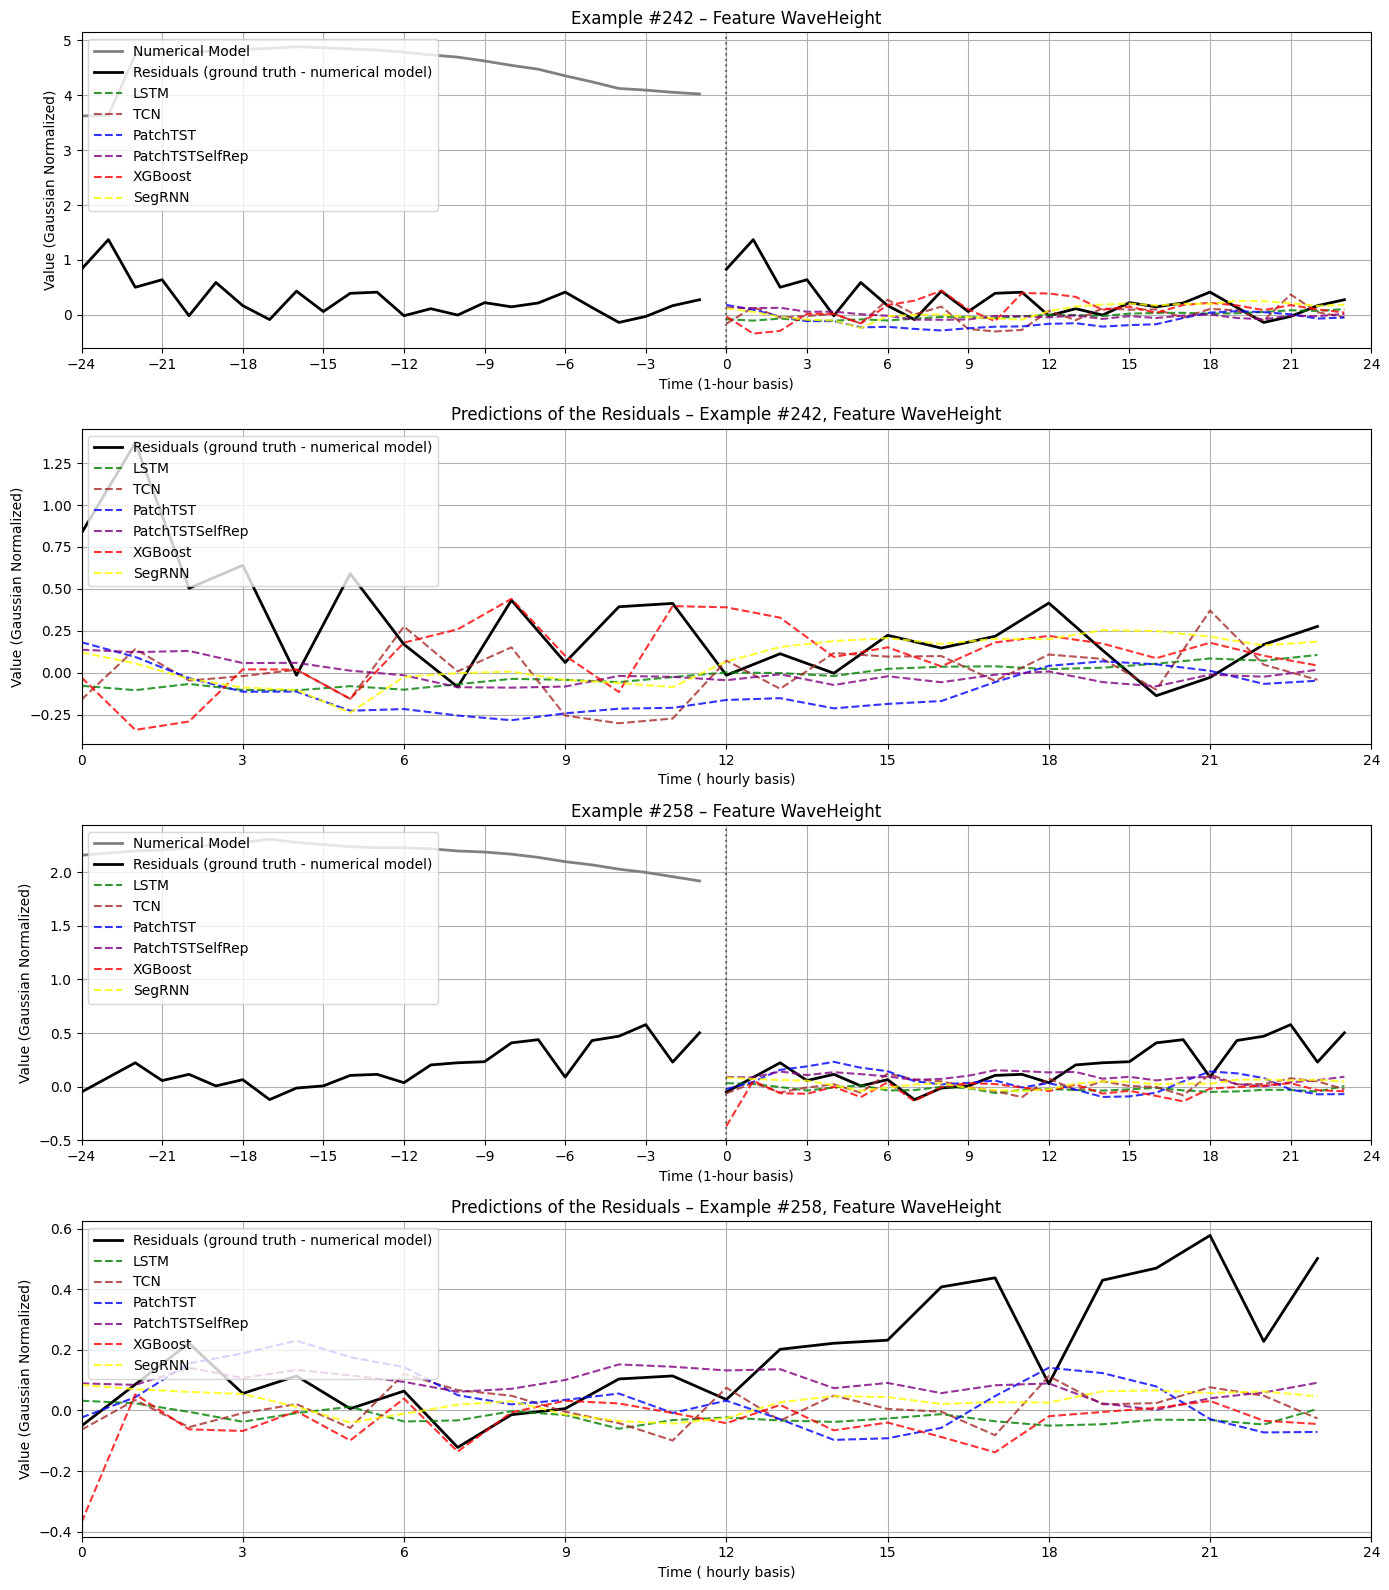

In [ ]:
#display(results_df_sorted)
display(results_df)

compare_models(
    X_true=X_true_Compare,
    Y_true=Y_true_Compare,
    model_preds=preds,
    target_idx=target_idx,
    model_types=types,
    model_params=params,
    training_times=times,
    model_colors=colors,
    num_windows_to_plot=2
)